In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from sklearn import preprocessing


import matplotlib.pyplot as plt

### We will be using Bank note Autentication Data from Kaggle /UCI Directory

In [2]:
df = pd.read_csv('C:/Users/nihal/Downloads/BankNote_Authentication.csv')

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

#### Below we are creating out target and training variables from the data in x and y

In [6]:
y = df['class']

In [7]:
x = df.drop(['class'], axis = 1)

In [8]:
x  #training variables/Input to the neural network

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [9]:
y #target Variable

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)  ## Training and testing split to check for model performance 

In [11]:
x_train.shape

(960, 4)

In [12]:
x_test.shape

(412, 4)

In [13]:
y_train.shape

(960,)

In [14]:
y_test.shape

(412,)

#### We are using the  traditional sigmoid activation for the first case scenario and checking the performace of the model

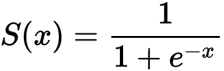

In [15]:
def sigmoid(x):
    import math
    return 1/ (1+math.exp(-x))

In [58]:
def sigmoid_numpy(X):          ## Applies the sigmoid function to an numpy array
    return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [59]:
def log_loss(y_true, y_predicted):  #categorical crossentropy
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    #y_predicted_new = to_categorical(y_predicted_new)
    return -np.mean(np.dot(y_true,np.log(y_predicted_new),out=None)+np.dot((1-y_true),np.log(1-y_predicted_new),out=None))
    #return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

### Case 1: Here we have declared a class of a neural network which will be performing on Sigmoid function as the activation fuction and then we will observe the model performace metrics.

In [21]:
class myNN_sigmoid:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.w3 = 1
        self.w4 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs):
        self.w1, self.w2, self.w3, self.w4, self.bias = self.gradient_descent(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3],y, epochs)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, w3: {self.w3}, w3: {self.w3}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test.iloc[:,0] + self.w2*X_test.iloc[:,1] +self.w3*X_test.iloc[:,2] + self.w4*X_test.iloc[:,3] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, attr1, attr2, attr3, attr4, y_true, epochs):
        w1 = w2 = w3 = w4 = 1
        bias = 0
        rate = 0.3
        n = len(attr1)
        loss_storage = []
        for i in range(epochs):
            weighted_sum = w1 * attr1 + w2 * attr2 + w3 * attr3 + w4 * attr4 + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            loss_storage.append(loss)
            
            w1d = (1/n)*np.dot(np.transpose(attr1),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(attr2),(y_predicted-y_true))
            w3d = (1/n)*np.dot(np.transpose(attr3),(y_predicted-y_true)) 
            w4d = (1/n)*np.dot(np.transpose(attr4),(y_predicted-y_true))  

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            w3 = w3 - rate * w3d
            w4 = w4 - rate * w4d
            bias = bias - rate * bias_d
            
            if i%5==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3:{w3}, w4:{w4}, bias:{bias}, loss:{loss}')
                
        plt.plot(loss_storage)
        plt.title('Loss vs Epochs for Sigmoid')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        return w1, w2, w3, w4, bias

Epoch:0, w1:0.39386835407827103, w2:0.22403226419114697, w3:1.0850135978204969, w4:1.0083732001122232, bias:-0.0631132398404672, loss:4325.9206935797465
Epoch:5, w1:-0.7347990129579309, w2:-0.005788216986420111, w3:-0.01770532699825715, w4:0.46175143115259754, bias:-0.1217572492178417, loss:417.1908831878433
Epoch:10, w1:-0.9381160336001356, w2:-0.20151900847503437, w3:-0.2520898134944256, w4:0.19462597951936772, bias:0.013686888642237088, loss:223.36426663704157
Epoch:15, w1:-1.0375208475529807, w2:-0.3249937295873775, w3:-0.3773950036534616, w4:0.040930254745050326, bias:0.1355852466962495, loss:164.9001040876189
Epoch:20, w1:-1.1055911984666413, w2:-0.41576926811330667, w3:-0.4654846958239557, w4:-0.05334257916864737, bias:0.2398619099572351, loss:136.44553566556587
Epoch:25, w1:-1.1597135742088762, w2:-0.48652371412665457, w3:-0.5345750819148545, w4:-0.11478060214975788, bias:0.33108536666654376, loss:119.43283960736798
Epoch:30, w1:-1.2060280203372742, w2:-0.5439883727685526, w3:-

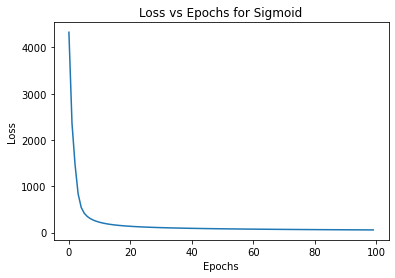

Final weights and bias: w1: -1.5928768996992044, w2: -0.9083444332757995, w3: -1.0014441125017322, w3: -1.0014441125017322, bias: 1.1142927095169113


In [22]:
model2 = myNN_sigmoid()
model2.fit(x_train,y_train,epochs = 100)

Epoch:0, w1:0.4731688536549937, w2:0.1958760556497986, w3:1.0747201209559332, w4:0.9990703041864384, bias:-0.04380755203425418, loss:1816.9220479054052
Epoch:5, w1:-0.6812454122213798, w2:-0.05791252760489321, w3:-0.07311507963025876, w4:0.4005579895929735, bias:-0.06368696227058622, loss:178.6681202689854
Epoch:10, w1:-0.9295778143936284, w2:-0.24584870155393773, w3:-0.2728812012584642, w4:0.1485055409267408, bias:0.07416956679807782, loss:90.85324744537732
Epoch:15, w1:-1.0434432047193543, w2:-0.35068228134088775, w3:-0.3857558764316665, w4:0.02309159042180599, bias:0.19480959686350077, loss:69.47562912713116
Epoch:20, w1:-1.1179519756994893, w2:-0.4266017883616759, w3:-0.4656318245009075, w4:-0.051923806606380594, bias:0.3005488420826568, loss:59.09994957819075
Epoch:25, w1:-1.1739595430737937, w2:-0.4860717484099439, w3:-0.5287928388843843, w4:-0.10064463154207345, bias:0.39533655224426756, loss:52.66075668248229
Epoch:30, w1:-1.2193887845421452, w2:-0.534905844636617, w3:-0.581533

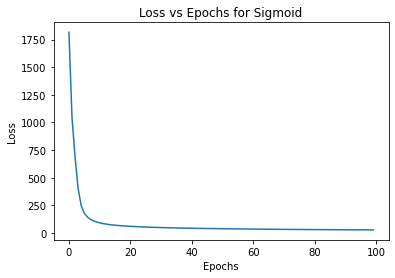

Final weights and bias: w1: -1.55033159933102, w2: -0.8546391667201629, w3: -0.9551044336901596, w3: -0.9551044336901596, bias: 1.2685316306612209


In [92]:
model2.fit(x_test,y_test,epochs = 100)

#### We can see in the above Loss vs Epochs graph that the model is clearly overfitting 


In [23]:
predictions = model2.predict(x_test)
predictions.dtype

dtype('float64')

In [24]:
round(predictions)

631     0.0
1117    1.0
70      0.0
875     1.0
1193    1.0
       ... 
604     0.0
1249    1.0
1239    1.0
649     0.0
185     0.0
Length: 412, dtype: float64

In [25]:
y_test

631     0
1117    1
70      0
875     1
1193    1
       ..
604     0
1249    1
1239    1
649     0
185     0
Name: class, Length: 412, dtype: int64

In [26]:
round(0.9856)

1

In [27]:
round(0.09856)

0

In [28]:
TP = 0
TN = 0
FP = 0
FN = 0

for actual ,predicted in zip(y_test,predictions):
    #print("Actual:",actual,"Predicted:",predicted)
    if round(predicted) == 1 and actual == 1:
        TP = TP+1
    elif round(predicted) == 1 and actual == 0:
        FP = FP+1
    elif round(predicted) == 0 and actual == 1:
        FN = FN+1
    else:
        TN = TN+1
        
    
print("True Positive :",TP,"True Negative :",TN,"False Positive :",FP,"False Negative :",FN)

True Positive : 189 True Negative : 215 False Positive : 3 False Negative : 5


In [29]:
#Classification metrics 

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print(Precision)
print(Recall)
print(Accuracy)

0.984375
0.9742268041237113
0.9805825242718447


In [30]:
F1_Score = 2*(Precision*Recall)/(Precision + Recall)

In [31]:
F1_Score

0.9792746113989637

### Case 2: Here we have declared a class of a neural network which will be performing on a custom function as the activation fuction and then we will observe the model performace metrics.


In [63]:
array_eg = [0,1,0]
def custom_activation_function(X):
    arr = []
    for x in X:
        ones = 0
        ones = x*(1/(x+np.exp(-x)))
        arr.append(ones)
    return arr

In [64]:
class myNN_CAF:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.w3 = 1
        self.w4 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs):
        self.w1, self.w2, self.w3, self.w4, self.bias = self.gradient_descent(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3],y, epochs)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, w3: {self.w3}, w3: {self.w3}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test.iloc[:,0] + self.w2*X_test.iloc[:,1] +self.w3*X_test.iloc[:,2] + self.w4*X_test.iloc[:,3] + self.bias
        return custom_activation_function(weighted_sum)

    def gradient_descent(self, attr1, attr2, attr3, attr4, y_true, epochs):
        w1 = w2 = w3 = w4 = 1
        bias = 0
        rate = 0.05
        n = len(attr1)
        loss_storage = []
        for i in range(epochs):
            weighted_sum = w1 * attr1 + w2 * attr2 + w3 * attr3 + w4 * attr4 + bias
            y_predicted = custom_activation_function(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            loss_storage.append(loss)
            
            w1d = (1/n)*np.dot(np.transpose(attr1),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(attr2),(y_predicted-y_true))
            w3d = (1/n)*np.dot(np.transpose(attr3),(y_predicted-y_true)) 
            w4d = (1/n)*np.dot(np.transpose(attr4),(y_predicted-y_true))  

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            w3 = w3 - rate * w3d
            w4 = w4 - rate * w4d
            bias = bias - rate * bias_d
            
            
            print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3:{w3}, w4:{w4}, bias:{bias}, loss:{loss}')
                
        plt.plot(loss_storage)
        plt.title('Loss vs Epochs for the custom avtivation fuction')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        return w1, w2, w3, w4, bias

Epoch:0, w1:0.883268686250939, w2:0.8607500470954881, w3:1.034500607018619, w4:0.9944617101023775, bias:-0.0015457108937586578, loss:16452.412512348375
Epoch:1, w1:0.7739838249721349, w2:0.7429725698654851, w3:1.0427972961150622, w4:0.9874600264868548, bias:-0.005886790986973236, loss:14244.196016133676
Epoch:2, w1:0.6703664788204524, w2:0.6465279703869677, w3:1.0312789260301005, w4:0.9786565788508154, bias:-0.012276337078501384, loss:12631.477576750422
Epoch:3, w1:0.5732244381673784, w2:0.5745539973303507, w3:1.0041072047086146, w4:0.9652139169727797, bias:-0.019157170590304768, loss:11631.778395104753
Epoch:4, w1:0.48483555600037753, w2:0.5302729363885985, w3:0.9626228948997843, w4:0.9445014983112103, bias:-0.025102709727468815, loss:10820.407259526215
Epoch:5, w1:0.4019936504574029, w2:0.5023841564257924, w3:0.9140558454555162, w4:0.9187623191099176, bias:-0.03001299202032967, loss:10454.628773429198
Epoch:6, w1:0.32214769287905193, w2:0.4826794313225635, w3:0.8624817620786456, w4:0

Epoch:93, w1:-0.15017796725797594, w2:-0.07687628192147525, w3:-0.07364742713144357, w4:-0.06450085111225135, bias:0.7042504829694338, loss:225.28282286418536
Epoch:94, w1:-0.1509196441975148, w2:-0.07734119157732833, w3:-0.07456042254300424, w4:-0.06404446856480717, bias:0.7094829006574034, loss:224.13155168375823
Epoch:95, w1:-0.15165819832444588, w2:-0.07779724907266797, w3:-0.07546201475442699, w4:-0.0635836650909463, bias:0.7146628199328817, loss:223.0067649214908
Epoch:96, w1:-0.15239345835198198, w2:-0.07824488720412674, w3:-0.07635253326032757, w4:-0.06311920662861643, bias:0.719791151486786, loss:221.90904375273487
Epoch:97, w1:-0.1531252706032456, w2:-0.07868450960146112, w3:-0.07723229059121671, w4:-0.06265179477132583, bias:0.7248687801232437, loss:220.83639566356626
Epoch:98, w1:-0.15385349755304542, w2:-0.07911649291006204, w3:-0.07810158346365663, w4:-0.062182071831267414, bias:0.7298965659018449, loss:219.78811897097597
Epoch:99, w1:-0.1545780164937413, w2:-0.0795411887

Epoch:179, w1:-0.1995658591060581, w2:-0.10222870842581046, w3:-0.12730372928271125, w4:-0.03222922364350379, bias:1.022638580635216, loss:178.4552129225255
Epoch:180, w1:-0.1999911139092354, w2:-0.10243289545616391, w3:-0.1277389601194719, w4:-0.03197636237988345, bias:1.0252572045214317, loss:178.23410018569325
Epoch:181, w1:-0.2004137322793399, w2:-0.10263578846865361, w3:-0.12817127559831878, w4:-0.031725676398505244, bias:1.0278584700261002, loss:178.01625241158084
Epoch:182, w1:-0.20083373755835635, w2:-0.10283740030848333, w3:-0.12860070541444127, w4:-0.031477139691460036, bias:1.0304425498298995, loss:177.80161019004714
Epoch:183, w1:-0.20125115282436434, w2:-0.10303774360201406, w3:-0.1290272788111444, w4:-0.031230726591926005, bias:1.0330096141472143, loss:177.5901154457875
Epoch:184, w1:-0.2016660008938768, w2:-0.1032368307633997, w3:-0.1294510245898036, w4:-0.030986411773158248, bias:1.035559830772684, loss:177.38171140206543
Epoch:185, w1:-0.20207830432425414, w2:-0.103434

Epoch:270, w1:-0.22971795920530583, w2:-0.11667428626092381, w3:-0.15769495786320803, w4:-0.015740358229298562, bias:1.2058578358517795, loss:167.32999806943295
Epoch:271, w1:-0.22997360752922993, w2:-0.11679667962159006, w3:-0.15794906309503648, w4:-0.015612209251782473, bias:1.2073925368226655, loss:167.27093486533602
Epoch:272, w1:-0.23022796241701163, w2:-0.11691845414117916, w3:-0.15820182957281642, w4:-0.015484888248905784, bias:1.2089191951509615, loss:167.21323700014278
Epoch:273, w1:-0.23048103269177037, w2:-0.11703961406316513, w3:-0.1584532669991427, w4:-0.015358387721304418, bias:1.2104378687359543, loss:167.15642061595793
Epoch:274, w1:-0.230732827093815, w2:-0.11716016359037558, w3:-0.1587033849784435, w4:-0.015232700260854352, bias:1.2119486148955858, loss:167.10031771415464
Epoch:275, w1:-0.23098335428165723, w2:-0.11728010688551542, w3:-0.15895219301829602, w4:-0.01510781854928381, bias:1.2134514903741627, loss:167.0449185095087
Epoch:276, w1:-0.23123262283300997, w2:-

Epoch:360, w1:-0.2484078057426758, w2:-0.12562456678332043, w3:-0.17613849528812398, w4:-0.006826515282904742, bias:1.317361472772291, loss:164.36423939304404
Epoch:361, w1:-0.24857471048340862, w2:-0.12570452680587124, w3:-0.17630204651017248, w4:-0.006750866948639452, bias:1.3183512590725857, loss:164.3478348207101
Epoch:362, w1:-0.24874087365380704, w2:-0.1257841322658571, w3:-0.17646485185942568, w4:-0.006675620789893403, bias:1.3193365491025058, loss:164.3316486145206
Epoch:363, w1:-0.24890629940509737, w2:-0.1258633851455736, w3:-0.1766269156851278, w4:-0.006600773959996985, bias:1.3203173689446748, loss:164.31567813431252
Epoch:364, w1:-0.24907099185767068, w2:-0.12594228741255273, w3:-0.17678824230251697, w4:-0.006526323639095921, bias:1.3212937444788608, loss:164.29992077457354
Epoch:365, w1:-0.24923495510138213, w2:-0.12602084101970737, w3:-0.17694883599317418, w4:-0.006452267033830983, bias:1.3222657013840504, loss:164.28470508093994
Epoch:366, w1:-0.24939819319584686, w2:-0

Epoch:449, w1:-0.2607651116620455, w2:-0.13154673996177485, w3:-0.18819689657485328, w4:-0.0013998684084445422, bias:1.3903848357525295, loss:163.6061403006797
Epoch:450, w1:-0.2608793772004775, w2:-0.13160152219585092, w3:-0.18830793460536746, w4:-0.0013512843087402548, bias:1.3910577137011078, loss:163.60289331813416
Epoch:451, w1:-0.26099317679589185, w2:-0.13165608144740204, w3:-0.18841851168104165, w4:-0.0013029264066841293, bias:1.3917278065853078, loss:163.59971757564318
Epoch:452, w1:-0.26110651271557284, w2:-0.1317104187989169, w3:-0.18852863011181836, w4:-0.0012547933700979513, bias:1.3923951283020568, loss:163.5966122220054
Epoch:453, w1:-0.2612193872127695, w2:-0.13176453532619303, w3:-0.18863829219276934, w4:-0.0012068838770223295, bias:1.3930596926592425, loss:163.59357641592823
Epoch:454, w1:-0.2613318025268077, w2:-0.13181843209839014, w3:-0.1887475002042197, w4:-0.0011591966156172587, bias:1.393721513376452, loss:163.59060932590234
Epoch:455, w1:-0.26144376088320115, w

Epoch:536, w1:-0.26917584667124955, w2:-0.13558020115789673, w3:-0.19634852773458616, w4:0.0021023646525915674, bias:1.439805039561174, loss:163.54988583702885
Epoch:537, w1:-0.26925678344153425, w2:-0.13561902639344975, w3:-0.19642676327780137, w4:0.0021353549924794106, bias:1.4402795712833625, loss:163.55095684824005
Epoch:538, w1:-0.26933740882489077, w2:-0.13565770247047138, w3:-0.1965046939670106, w4:0.002168205225401169, bias:1.4407522581158558, loss:163.5520499265468
Epoch:539, w1:-0.269417724192514, w2:-0.13569623004431594, w3:-0.1965823211742839, w4:0.0022009160705918083, bias:1.4412231083328386, loss:163.55316476368137
Epoch:540, w1:-0.2694977309082239, w2:-0.13573460976682197, w3:-0.1966596462640788, w4:0.002233488242608344, bias:1.4416921301627879, loss:163.55430105480042
Epoch:541, w1:-0.2695774303285157, w2:-0.13577284228633585, w3:-0.19673667059329408, w4:0.002265922451368219, bias:1.442159331788794, loss:163.5554584984458
Epoch:542, w1:-0.2696568238026097, w2:-0.1358109

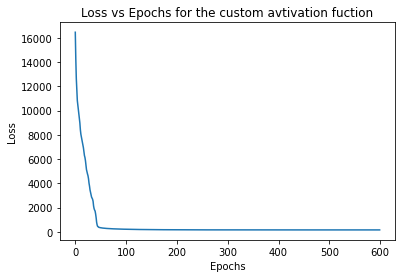

Final weights and bias: w1: -0.27371710894046297, w2: -0.13775896997803197, w3: -0.20073228660446968, w3: -0.20073228660446968, bias: 1.4664008979434304


In [65]:
model3 = myNN_CAF()
model3.fit(x_train,y_train,epochs = 600)

Epoch:0, w1:0.8949914533981282, w2:0.8567893097448448, w3:1.0339123330388909, w4:0.9912777131480224, bias:0.00249438021202948, loss:7476.971222239639
Epoch:1, w1:0.7981066652855175, w2:0.735596019558988, w3:1.03969070238422, w4:0.9820993828201648, bias:0.0026906501144360845, loss:6610.5657019965165
Epoch:2, w1:0.7099220224380967, w2:0.6437774979961846, w3:1.0153954706789698, w4:0.972162616671811, bias:0.00029383498511979236, loss:5834.376264260211
Epoch:3, w1:0.6256678440431842, w2:0.5696103109855107, w3:0.980383084072937, w4:0.9580749274744736, bias:-0.0025538946960495233, loss:5405.252792207752
Epoch:4, w1:0.5456370690348428, w2:0.5132778941207536, w3:0.936406389807153, w4:0.9396144047686057, bias:-0.005211521895705218, loss:5199.8416296808155
Epoch:5, w1:0.47016019043762836, w2:0.472804264843053, w3:0.8848159053411965, w4:0.9173673212850776, bias:-0.00727941262810706, loss:4982.851825191614
Epoch:6, w1:0.3976987944620701, w2:0.4425226361344471, w3:0.8291199725680175, w4:0.8921825013

Epoch:68, w1:-0.1524144388223761, w2:-0.070522824686155, w3:-0.05257485298808568, w4:-0.07431190193530811, bias:0.6001612329519546, loss:109.46693465125884
Epoch:69, w1:-0.15292483041170757, w2:-0.07148063060460269, w3:-0.05382947257867886, w4:-0.07476220218315754, bias:0.6069998537289102, loss:108.5177217659018
Epoch:70, w1:-0.1534580292327938, w2:-0.07239987379514937, w3:-0.05505876214779335, w4:-0.07513473879985284, bias:0.6137507985703827, loss:107.60444933402319
Epoch:71, w1:-0.15401169481627613, w2:-0.07328305611797976, w3:-0.05626394924519421, w4:-0.0754355615310534, bias:0.6204164420359687, loss:106.72227531139075
Epoch:72, w1:-0.15458370852496375, w2:-0.07413249107031253, w3:-0.05744617060316239, w4:-0.0756702666891539, bias:0.6269990404673058, loss:105.8762045108591
Epoch:73, w1:-0.1551721495028743, w2:-0.07495031965738876, w3:-0.05860648056168321, w4:-0.07584403247758953, bias:0.6335007407645125, loss:105.05603573595623
Epoch:74, w1:-0.1557752736201247, w2:-0.075738524767665

Epoch:134, w1:-0.19470310366933866, w2:-0.1009139221210341, w3:-0.10707633275816314, w4:-0.05452584783084036, bias:0.9269032616363195, loss:79.52399036941603
Epoch:135, w1:-0.19526995200821884, w2:-0.10118233821466978, w3:-0.10765424600871003, w4:-0.054139876032172164, bias:0.9305258053964384, loss:79.31440180770565
Epoch:136, w1:-0.1958333273530138, w2:-0.10144849960903453, w3:-0.10822759581838098, w4:-0.053756918498461495, bias:0.9341206425976889, loss:79.10953002660438
Epoch:137, w1:-0.1963932466980325, w2:-0.10171245209369081, w3:-0.10879644569209047, w4:-0.05337698123460628, bias:0.9376881161709935, loss:78.90803572080092
Epoch:138, w1:-0.19694972782746922, w2:-0.10197423955605919, w3:-0.10936085759184072, w4:-0.05300006718537449, bias:0.9412285626823765, loss:78.7098453820561
Epoch:139, w1:-0.197502789241734, w2:-0.10223390408769784, w3:-0.10992089199539908, w4:-0.05262617647962617, bias:0.9447423124989331, loss:78.51488754485374
Epoch:140, w1:-0.19805245008890252, w2:-0.10249148

Epoch:204, w1:-0.22716444943447578, w2:-0.11577461978494491, w3:-0.13903105127908977, w4:-0.03392785142442516, bias:1.1279692517369502, loss:70.79377404097269
Epoch:205, w1:-0.22753961475092194, w2:-0.11594354343262982, w3:-0.13939063678178834, w4:-0.03370960443381855, bias:1.13023657057487, loss:70.72539034476242
Epoch:206, w1:-0.22791273765226847, w2:-0.11611152065423784, w3:-0.13974809602432733, w4:-0.03349298818456128, bias:1.1324905421292526, loss:70.65909414732013
Epoch:207, w1:-0.2282838339578111, w2:-0.1162785595181844, w3:-0.14010344789074705, w4:-0.033277985170004507, bias:1.13473128397644, loss:70.59374248709443
Epoch:208, w1:-0.22865291932653706, w2:-0.11644466798208647, w3:-0.14045671101977591, w4:-0.03306457811103984, bias:1.1369589122027772, loss:70.52923829985737
Epoch:209, w1:-0.22902000925863475, w2:-0.11660985389533475, w3:-0.14080790380925334, w4:-0.03285274995388164, bias:1.1391735414296327, loss:70.46556814376902
Epoch:210, w1:-0.22938511909702006, w2:-0.116774125

Epoch:271, w1:-0.2484344636270993, w2:-0.12531970964321704, w3:-0.15917297623864135, w4:-0.02222298618335087, bias:1.2550578936305217, loss:67.8130811944635
Epoch:272, w1:-0.24870124389938947, w2:-0.12543911487098916, w3:-0.15942270609204623, w4:-0.02208432438766417, bias:1.2566346865638145, loss:67.78579357082268
Epoch:273, w1:-0.2489667582881733, w2:-0.12555794758340036, w3:-0.15967118527185473, w4:-0.02194650835843171, bias:1.2582036095923226, loss:67.75882233237866
Epoch:274, w1:-0.24923101502283765, w2:-0.12567621159630488, w3:-0.15991842259185926, w4:-0.021809530710343014, bias:1.2597647180060734, loss:67.73216331547025
Epoch:275, w1:-0.2494940222588924, w2:-0.12579391068951393, w3:-0.16016442677825415, w4:-0.021673384145611315, bias:1.2613180665471246, loss:67.7058124215155
Epoch:276, w1:-0.24975578807882493, w2:-0.12591104860725966, w3:-0.16040920647079146, w4:-0.02153806145268276, bias:1.2628637094167512, loss:67.6797656158037
Epoch:277, w1:-0.2500163204929432, w2:-0.126027629

Epoch:333, w1:-0.2628559708679815, w2:-0.13176700316445714, w3:-0.17258213910451828, w4:-0.014987623476315385, bias:1.3397627224728115, loss:66.63038329641262
Epoch:334, w1:-0.26305744504833145, w2:-0.131856981386136, w3:-0.17276822179737963, w4:-0.014890143407458626, bias:1.3409387798219328, loss:66.61757431411301
Epoch:335, w1:-0.2632580506698832, w2:-0.13194656954170902, w3:-0.17295346968140168, w4:-0.014793177893202137, bias:1.342109577589633, loss:66.6049082673815
Epoch:336, w1:-0.26345779263884644, w2:-0.13203576986414123, w3:-0.17313788776845523, w4:-0.014696723178330895, bias:1.3432751472541367, loss:66.59238348802684
Epoch:337, w1:-0.2636566758237951, w2:-0.13212458456884146, w3:-0.173321481028964, w4:-0.01460077554479805, bias:1.3444355200338625, loss:66.57999833012798
Epoch:338, w1:-0.2638547050560454, w2:-0.13221301585384576, w3:-0.1735042543923572, w4:-0.014505331311255679, bias:1.3455907268902578, loss:66.56775116968699
Epoch:339, w1:-0.2640518851300292, w2:-0.13230106589

Epoch:400, w1:-0.2746437781645882, w2:-0.13702818051088303, w3:-0.18341607520084144, w4:-0.009438820604480168, bias:1.40826246154584, loss:66.04099933539936
Epoch:401, w1:-0.2747963540267135, w2:-0.13709624086772407, w3:-0.18355561742626783, w4:-0.00936899212981777, bias:1.4091451330872231, loss:66.03538580335096
Epoch:402, w1:-0.27494832191298774, w2:-0.13716402919423604, w3:-0.18369458676731684, w4:-0.009299490782123712, bias:1.4100241909425721, loss:66.0298376713359
Epoch:403, w1:-0.2750996848625449, w2:-0.13723154686069008, w3:-0.18383298622633237, w4:-0.0092303145244618, bias:1.4108996539897847, loss:66.0243542339239
Epoch:404, w1:-0.27525044589442144, w2:-0.1372987952281608, w3:-0.18397081878457588, w4:-0.009161461336885729, bias:1.411771540974516, loss:66.01893479397665
Epoch:405, w1:-0.27540060800773036, w2:-0.13736577564860739, w3:-0.18410808740242096, w4:-0.009092929216257751, bias:1.412639870511397, loss:66.01357866253653
Epoch:406, w1:-0.27555017418183253, w2:-0.13743248946

Epoch:464, w1:-0.2832980041651086, w2:-0.14088743670960177, w3:-0.19130486906644678, w4:-0.0055539884557374575, bias:1.4581790998702784, loss:65.80469145819646
Epoch:465, w1:-0.28341705679142637, w2:-0.14094051199102492, w3:-0.19141302955882583, w4:-0.005501597905218294, bias:1.458863723564766, loss:65.80297141050063
Epoch:466, w1:-0.28353566163582705, w2:-0.14099338729212343, w3:-0.1915207736965882, w4:-0.005449432077546498, bias:1.4595457182795617, loss:65.80134418393692
Epoch:467, w1:-0.28365382073629103, w2:-0.14104606352730778, w3:-0.19162810344792444, w4:-0.0053974897368919824, bias:1.4602250964036303, loss:65.79974591962308
Epoch:468, w1:-0.2837715361188581, w2:-0.14109854160557936, w3:-0.19173502076890117, w4:-0.00534576965638275, bias:1.4609018702498313, loss:65.79817630021718
Epoch:469, w1:-0.2838888097977181, w2:-0.14115082243057223, w3:-0.19184152760355835, w4:-0.005294270618021847, bias:1.4615760520555294, loss:65.79663501184434
Epoch:470, w1:-0.28400564377530074, w2:-0.14

Epoch:528, w1:-0.290092599966426, w2:-0.1439160460381761, w3:-0.19746274447330103, w4:-0.002607666897212021, bias:1.4971670448159629, loss:65.74622369992613
Epoch:529, w1:-0.2901866573413988, w2:-0.14395796440979503, w3:-0.19754777618282743, w4:-0.0025674939741518223, bias:1.4977055649322366, loss:65.74591762829918
Epoch:530, w1:-0.29028037659037637, w2:-0.1439997319317431, w3:-0.19763249657260856, w4:-0.0025274817945969805, bias:1.498242117551133, loss:65.7456259265685
Epoch:531, w1:-0.290373759139469, w2:-0.1440413492420892, w3:-0.19771690699677294, w4:-0.0024876295610646412, bias:1.4987767112055141, loss:65.74535096313252
Epoch:532, w1:-0.2904668064072539, w2:-0.1440828169755106, w3:-0.19780100880198603, w4:-0.0024479364811886566, bias:1.4993093543813552, loss:65.74513472667334
Epoch:533, w1:-0.29055951980482636, w2:-0.14412413576331604, w3:-0.19788480332750336, w4:-0.0024084017676777145, bias:1.4998400555180749, loss:65.74493221028656
Epoch:534, w1:-0.29065190073585, w2:-0.14416530

Epoch:595, w1:-0.29570984431594016, w2:-0.1464192212473822, w3:-0.20253115928091703, w4:-0.0002368369899978657, bias:1.529273524570841, loss:65.75355724087518
Epoch:596, w1:-0.2957840748236492, w2:-0.1464522970332155, w3:-0.2025980055650121, w4:-0.0002058872810809216, bias:1.529697071452361, loss:65.7539610993546
Epoch:597, w1:-0.29585804824906214, w2:-0.14648525819772096, w3:-0.20266461697668245, w4:-0.00017505447120156982, bias:1.5301191327992019, loss:65.75437129870771
Epoch:598, w1:-0.2959317656085772, w2:-0.14651810519486083, w3:-0.20273099446800374, w4:-0.0001443380299774566, bias:1.5305397146171058, loss:65.75478775753477
Epoch:599, w1:-0.29600522791369843, w2:-0.14655083847640274, w3:-0.20279713898629917, w4:-0.00011373743007056507, bias:1.5309588228819262, loss:65.75521039525403


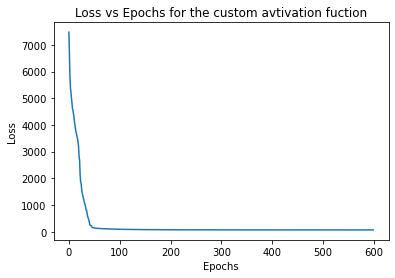

Final weights and bias: w1: -0.29600522791369843, w2: -0.14655083847640274, w3: -0.20279713898629917, w3: -0.20279713898629917, bias: 1.5309588228819262


In [94]:
model3.fit(x_test,y_test,epochs = 600)

#### Here we can see that the model has pperformed better as the overfitting problem is reduced.

In [66]:
predictions2 = model3.predict(x_test)
predictions2

[-0.032936274941770385,
 0.9298040121519582,
 0.2274092177651584,
 0.8853632469056546,
 0.8830585443148691,
 0.9141409631267277,
 -0.2876479652672879,
 0.06864959035111194,
 0.7621859425924279,
 0.9092898686390957,
 0.90196423132603,
 0.914429970174468,
 0.9053944618962904,
 0.2090114850169986,
 0.31293084244103614,
 0.14909582870208396,
 0.12433409000767943,
 -0.03225435377410413,
 0.17235294947512445,
 -0.39499884642779326,
 0.8724340757498835,
 0.6413103787865956,
 0.1602596416330274,
 0.9204641418322486,
 0.013827613866439747,
 0.8821421291948869,
 0.05651185062422373,
 0.1918005125957361,
 -0.30590071452917655,
 0.8496946131260972,
 -0.49600801862246724,
 0.19636629954566412,
 0.948443489316189,
 -0.285969124618554,
 0.7187663401578027,
 0.8976894748326435,
 0.8772770590369259,
 0.9367151092892178,
 0.23310708614708425,
 0.3354681268426182,
 -0.2764793211049338,
 0.8364533144130777,
 0.8933279249463576,
 0.8977147072641667,
 0.7840174824669796,
 0.6413103787865956,
 0.105815121359

In [67]:
new_predictions2 = []

for p in predictions2:
    new_predictions2.append(round(abs(p)))

new_predictions2

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,


In [68]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [69]:
TP = 0
TN = 0
FP = 0
FN = 0

for actual ,predicted in zip(y_test,predictions2):
    #print("Actual:",actual,"Predicted:",predicted)
    if round(predicted) == 1 and actual == 1:
        TP = TP+1
    elif round(predicted) == 1 and actual == 0:
        FP = FP+1
    elif round(predicted) == 0 and actual == 1:
        FN = FN+1
    else:
        TN = TN+1
        
    
print("True Positive :",TP,"True Negative :",TN,"False Positive :",FP,"False Negative :",FN)

True Positive : 194 True Negative : 200 False Positive : 18 False Negative : 0


In [70]:
#Classification metrics 

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print(Precision)
print(Recall)
print(Accuracy)

0.9150943396226415
1.0
0.9563106796116505


In [71]:
F1_Score = 2*(Precision*Recall)/(Precision + Recall)

In [72]:
F1_Score

0.9556650246305419

#### The model performace metrics is not as good as sigmoid but the overfitting problem is taken care of.

### Case 3: Here we have declared a class of a neural network which will be performing on a custom function as the activation fuction and then we will observe the model performace metrics.

Here we have declared a parameter alpha which will be controlled based on the threshold of the Loss from training data.The alpha is class member and is called back everytime the alpha valuye drops

In [73]:
import random


def final_activation_fuction(X,alpha):
    return alpha/(alpha + np.exp(-X))

In [90]:
class myNN_FAF:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.w3 = 1
        self.w4 = 1
        self.bias = 0
        self.loss = 0
        self.alpha = 0.0000001
        
    def fit(self, X, y, epochs):
        
        while self.loss >= 145.0 and self.loss < 160.0:
            self.w1, self.w2, self.w3, self.w4, self.bias, self.loss = self.gradient_descent(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3],y, epochs,self.alpha)
             
        self.w1, self.w2, self.w3, self.w4, self.bias, self.loss = self.gradient_descent(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3],y, epochs,self.alpha)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, w3: {self.w3}, w3: {self.w3}, bias: {self.bias}")
        print(f"Alpha Value:",self.alpha)
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test.iloc[:,0] + self.w2*X_test.iloc[:,1] +self.w3*X_test.iloc[:,2] + self.w4*X_test.iloc[:,3] + self.bias
        return final_activation_fuction(weighted_sum,self.alpha)

    def gradient_descent(self, attr1, attr2, attr3, attr4, y_true, epochs,alpha):
        w1 = w2 = w3 = w4 = 1
        bias = 0
        rate = 0.04
        n = len(attr1)
        loss_storage = []
        for i in range(epochs):
            weighted_sum = w1 * attr1 + w2 * attr2 + w3 * attr3 + w4 * attr4 + bias
            if self.loss < 160.0 and self.loss > 145.0:
                self.alpha = random.uniform(0.03, 0.07)
                y_predicted = final_activation_fuction(weighted_sum,self.alpha)
            elif self.loss > 160.0 and self.loss==0:
                y_predicted = final_activation_fuction(weighted_sum,self.alpha)
                
            y_predicted = final_activation_fuction(weighted_sum,self.alpha)
            self.loss = log_loss(y_true, y_predicted)
            
            loss_storage.append(self.loss)
            
            w1d = (1/n)*np.dot(np.transpose(attr1),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(attr2),(y_predicted-y_true))
            w3d = (1/n)*np.dot(np.transpose(attr3),(y_predicted-y_true)) 
            w4d = (1/n)*np.dot(np.transpose(attr4),(y_predicted-y_true))  

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            w3 = w3 - rate * w3d
            w4 = w4 - rate * w4d
            bias = bias - rate * bias_d
            
            
            print (f'Epoch:{i}, w1:{w1}, w2:{w2}, w3:{w3}, w4:{w4}, bias:{bias}, loss:{self.loss}')
                
        plt.plot(loss_storage)
        plt.title('Loss vs Epochs for the custom avtivation fuction')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
        if self.loss <=160.0:
            return w1, w2, w2, w4, bias, self.loss
        return w1, w2, w3, w4, bias, 0

Epoch:0, w1:0.9680245237642259, w2:0.9834482916692617, w3:1.0358281348129383, w4:0.9784067037060858, bias:0.01732777047678282, loss:7527.108350161223
Epoch:1, w1:0.9360531563569043, w2:0.9669028761208133, w3:1.071654079327239, w4:0.9568131385131075, bias:0.034656413843902514, loss:7446.794399186625
Epoch:2, w1:0.9040848792665399, w2:0.9503620997298458, w3:1.1074780965651028, w4:0.9352193932329396, bias:0.05198567079982707, loss:7366.493710366384
Epoch:3, w1:0.8721189572193532, w2:0.9338247343062832, w3:1.1433002586448673, w4:0.9136255189663104, bias:0.06931533385853718, loss:7286.203526630916
Epoch:4, w1:0.8401548628608926, w2:0.917289858697481, w3:1.1791204644355333, w4:0.8920315384598672, bias:0.08664522858635025, loss:7205.922052913674
Epoch:5, w1:0.8081922246351456, w2:0.9007567749957902, w3:1.2149384375849808, w4:0.8704374517536756, bias:0.103975198342703, loss:7125.648263999134
Epoch:6, w1:0.7762307923854463, w2:0.8842249520735118, w3:1.2507537030800924, w4:0.8488432393294408, bi

Epoch:58, w1:-0.6300810397683232, w2:0.6474658902496555, w3:2.143696009451982, w4:-0.19189337277168067, bias:0.9363658494704533, loss:4604.2838742257345
Epoch:59, w1:-0.6527094578114093, w2:0.6503790714917689, w3:2.145093450108614, w4:-0.2097560753069609, bias:0.9502720794646635, loss:4579.182526778879
Epoch:60, w1:-0.6752014326807687, w2:0.6531234874914917, w3:2.1462348532761273, w4:-0.22744999971789154, bias:0.9641245818865282, loss:4554.434952951673
Epoch:61, w1:-0.6975474152187144, w2:0.6556761524114598, w3:2.147126306360673, w4:-0.24496110447577868, bias:0.9779220055623625, loss:4530.058045786011
Epoch:62, w1:-0.7197359270380682, w2:0.6580137605274361, w3:2.1477735976683774, w4:-0.2622738101084393, bias:0.9916627576357565, loss:4506.071042051272
Epoch:63, w1:-0.7417533420814827, w2:0.6601125513248473, w3:2.1481822045746406, w4:-0.27937091795855723, bias:1.0053449807219939, loss:4482.4957446415565
Epoch:64, w1:-0.7635838170309451, w2:0.6619483674053336, w3:2.148357283417452, w4:-0.

Epoch:123, w1:-1.692408097300688, w2:0.42062717448436093, w3:1.9091784949250077, w4:-0.9154681413934153, bias:1.7352484251091513, loss:3657.0381671504856
Epoch:124, w1:-1.7050607704341603, w2:0.41516611173986967, w3:1.9030813146197163, w4:-0.9231878735216991, bias:1.7466642949944216, loss:3646.9961095862704
Epoch:125, w1:-1.7176652617193457, w2:0.4097204156468229, w3:1.8969599963928283, w4:-0.9308732231067596, bias:1.7580695915834497, loss:3636.999179859279
Epoch:126, w1:-1.730222233307583, w2:0.404290234372121, w3:1.8908157098713603, w4:-0.9385248499274341, bias:1.7694645057092537, loss:3627.0467572213356
Epoch:127, w1:-1.7427322785987946, w2:0.3988756422011298, w3:1.884649583452617, w4:-0.9461433415276524, bias:1.780849209453815, loss:3617.138281341733
Epoch:128, w1:-1.7551959252520752, w2:0.39347664508055186, w3:1.8784627049771845, w4:-0.953729216487579, bias:1.792223856807026, loss:3607.2732492152018
Epoch:129, w1:-1.7676136382617966, w2:0.38809318611187604, w3:1.8722561224311498, 

Epoch:186, w1:-2.400771362011528, w2:0.09761121900453819, w3:1.5055819106984312, w4:-1.3402571445037297, bias:2.435175687901625, loss:3105.1696246513343
Epoch:187, w1:-2.410555187970264, w2:0.09271966527704395, w3:1.4990957768224544, w4:-1.3460206611595882, bias:2.4459572803879164, loss:3097.6745155101435
Epoch:188, w1:-2.420295244013305, w2:0.08783683707169368, w3:1.492610079055553, w4:-1.351757522443376, bias:2.456728535145251, loss:3090.2150307786
Epoch:189, w1:-2.429991775627157, w2:0.08296294951056828, w3:1.486124837909988, w4:-1.3574680754981872, bias:2.4674894882041394, loss:3082.790866086532
Epoch:190, w1:-2.439645033252513, w2:0.07809821482479076, w3:1.4796400726549777, w4:-1.363152669227079, bias:2.4782401771243476, loss:3075.4017147566283
Epoch:191, w1:-2.449255271872745, w2:0.07324284169701625, w3:1.4731558016097528, w4:-1.3688116536432773, bias:2.488980640905468, loss:3068.047268209116
Epoch:192, w1:-2.4588227506495066, w2:0.06839703467641717, w3:1.46667204241993, w4:-1.37

Epoch:250, w1:-2.950800907304273, w2:-0.19240425781923828, w3:1.092569787684561, w4:-1.6687804995797038, bias:3.106557248811052, loss:2684.5460933564796
Epoch:251, w1:-2.9583855060344133, w2:-0.1965362369550754, w3:1.0861823048658423, w4:-1.6734521171291252, bias:3.1167912482853937, loss:2678.7258850223247
Epoch:252, w1:-2.9659457496696184, w2:-0.20065688615551364, w3:1.0797980873663668, w4:-1.6781141077537247, bias:3.127018771860714, loss:2672.9232595001263
Epoch:253, w1:-2.973481892401183, w2:-0.20476632195259972, w3:1.073417188360426, w4:-1.6827666027931043, bias:3.13723987052085, loss:2667.138019211903
Epoch:254, w1:-2.980994183423724, w2:-0.20886466399483006, w3:1.0670396602164562, w4:-1.6874097288489496, bias:3.1474545938078142, loss:2661.369970554195
Epoch:255, w1:-2.988482866893066, w2:-0.2129520349219826, w3:1.0606655544989747, w4:-1.6920436078248098, bias:3.157662989806116, loss:2655.618923899984
Epoch:256, w1:-2.9959481818936218, w2:-0.21702856023848488, w3:1.054294921974709

Epoch:315, w1:-3.4010372010661936, w2:-0.4436165684973407, w3:0.6861409486745863, w4:-1.955438686563487, bias:3.7595825305199915, loss:2336.6548336352953
Epoch:316, w1:-3.407368791508353, w2:-0.44731078398415874, w3:0.680057082019942, w4:-1.959592900533556, bias:3.7694431251181775, loss:2331.7204497404045
Epoch:317, w1:-3.4136838145831554, w2:-0.4510027949917808, w3:0.673979279827521, w4:-1.963738984786655, bias:3.7792979740311097, loss:2326.797608856798
Epoch:318, w1:-3.4199823000023044, w2:-0.45469270301430265, w3:0.667907585463614, w4:-1.9678769027403524, bias:3.7891470616861205, loss:2321.8862906020295
Epoch:319, w1:-3.426264276277652, w2:-0.45838060682791887, w3:0.6618420421592667, w4:-1.9720066177596232, bias:3.798990372203789, loss:2316.9864755976655
Epoch:320, w1:-3.432529770779363, w2:-0.4620666024381762, w3:0.6557826929858358, w4:-1.9761280932397411, bias:3.8088278894207863, loss:2312.0981454191406
Epoch:321, w1:-3.438778809793187, w2:-0.46575078302910056, w3:0.64972958083057

Epoch:380, w1:-3.7790019559016206, w2:-0.681566375056306, w3:0.3049625802588648, w4:-2.2074226588645733, bias:4.387835552925787, loss:2039.3939378596322
Epoch:381, w1:-3.7842959234260736, w2:-0.6852001613178681, w3:0.2993469574719175, w4:-2.211006724083204, bias:4.397288585008603, loss:2035.1864771648877
Epoch:382, w1:-3.7895745215577388, w2:-0.6888325803155847, w3:0.293739425754279, w4:-2.214582083740896, bias:4.406734890154792, loss:2030.9898893803042
Epoch:383, w1:-3.7948377739751926, w2:-0.6924635887460807, w3:0.2881400067143266, w4:-2.2181487533244804, bias:4.416174457975595, loss:2026.8041635996328
Epoch:384, w1:-3.8000857047637315, w2:-0.6960931433982448, w3:0.2825487220382825, w4:-2.2217067480010164, bias:4.425607278165382, loss:2022.6292888576875
Epoch:385, w1:-3.8053183384165985, w2:-0.6997212012306598, w3:0.27696559351326144, w4:-2.2252560825505374, bias:4.43503334049235, loss:2018.4652541382534
Epoch:386, w1:-3.8105356998355595, w2:-0.7033477194468872, w3:0.2713906430504073

Epoch:442, w1:-4.0792566407121775, w2:-0.9030313656964327, w3:-0.02691295751747664, w4:-2.4132108448862795, bias:4.960786927666033, loss:1798.7144651149254
Epoch:443, w1:-4.083654688511674, w2:-0.9065281977224326, w3:-0.03197266237908514, w4:-2.416242680767186, bias:4.969800452544844, loss:1795.164058273439
Epoch:444, w1:-4.0880393392755145, w2:-0.9100225987479249, w3:-0.037022199877050486, w4:-2.4192644015019042, bias:4.978806376496018, loss:1791.624106642768
Epoch:445, w1:-4.092410625622091, w2:-0.9135145768313846, w3:-0.042061526903872555, w4:-2.4222759381933923, bias:4.987804677396026, loss:1788.0946104087839
Epoch:446, w1:-4.096768579953977, w2:-0.9170041400443257, w3:-0.04709060078220923, w4:-2.425277221287963, bias:4.99679533292015, loss:1784.5755697744148
Epoch:447, w1:-4.10111323445205, w2:-0.9204912964188862, w3:-0.05210937933018839, w4:-2.428268180660226, bias:5.005778320557245, loss:1781.066984933332
Epoch:448, w1:-4.105444621070171, w2:-0.9239760538964623, w3:-0.0571178209

Epoch:508, w1:-4.34212409398647, w2:-1.1287023285147733, w3:-0.3378705547845195, w4:-2.5886760921709726, bias:5.53836863149632, loss:1586.611703750828
Epoch:509, w1:-4.345698397548374, w2:-1.1320372908898233, w3:-0.3422223592093598, w4:-2.5909144027758724, bias:5.546835709159555, loss:1583.735640700673
Epoch:510, w1:-4.349261076053193, w2:-1.1353694632629965, w3:-0.3465640045230765, w4:-2.5931395814122693, bias:5.555294011529172, loss:1580.8691309843998
Epoch:511, w1:-4.352812155328793, w2:-1.138698830679445, w3:-0.3508955390310011, w4:-2.595351625604332, bias:5.563743533072063, loss:1578.0121415832891
Epoch:512, w1:-4.356351661345935, w2:-1.1420253781395875, w3:-0.35521701189752763, w4:-2.5975505340882172, bias:5.572184268707971, loss:1575.1646390569151
Epoch:513, w1:-4.359879620223059, w2:-1.145349090594633, w3:-0.35952847310963176, w4:-2.599736306801059, bias:5.5806162138085345, loss:1572.326589557451
Epoch:514, w1:-4.363396058230746, w2:-1.1486699529411912, w3:-0.363829973440804, w

Epoch:572, w1:-4.548625802702457, w2:-1.335811640943178, w3:-0.5982216481946637, w4:-2.706055225057301, bias:6.06261309902056, loss:1420.2598899708005
Epoch:573, w1:-4.5515150872477115, w2:-1.3389320980114852, w3:-0.602036951857414, w4:-2.7074930464275484, bias:6.070524901913023, loss:1417.9192250443498
Epoch:574, w1:-4.554394720625745, w2:-1.3420485161151279, w3:-0.6058457080925597, w4:-2.7089196374609585, bias:6.078428384285578, loss:1415.5856574189957
Epoch:575, w1:-4.557264737215261, w2:-1.3451608733748166, w3:-0.6096479669328153, w4:-2.7103350521498615, bias:6.086323563397576, loss:1413.2591494882022
Epoch:576, w1:-4.560125171404856, w2:-1.3482691481397058, w3:-0.6134437779252935, w4:-2.7117393448153013, bias:6.094210456694946, loss:1410.9396637930447
Epoch:577, w1:-4.562976057587502, w2:-1.3513733190070996, w3:-0.6172331901271246, w4:-2.7131325700836575, bias:6.102089081803497, loss:1408.6271630245717
Epoch:578, w1:-4.565817430155054, w2:-1.3544733648419798, w3:-0.621016252101575

Epoch:631, w1:-4.703678103593475, w2:-1.512478357899993, w3:-0.8135234227296575, w4:-2.7734719106934405, bias:6.515787598155691, loss:1293.1558166267598
Epoch:632, w1:-4.706054996776194, w2:-1.5153369505519227, w3:-0.8170221340321535, w4:-2.7743411121457586, bias:6.523241300214303, loss:1291.1749290662624
Epoch:633, w1:-4.708424145753674, w2:-1.5181909934417361, w3:-0.8205164329423369, w4:-2.7752022285298454, bias:6.530687829091674, loss:1289.199209325221
Epoch:634, w1:-4.710785579461217, w2:-1.5210404921016336, w3:-0.8240063429647234, w4:-2.776055305972103, bias:6.538127203908416, loss:1287.2286301521626
Epoch:635, w1:-4.71313932673027, w2:-1.523885452316994, w3:-0.8274918872351097, w4:-2.776900390311385, bias:6.5455594437218645, loss:1285.2631644916673
Epoch:636, w1:-4.715485416291276, w2:-1.5267258801064962, w3:-0.830973088521219, w4:-2.7777375271043585, bias:6.552984567525317, loss:1283.3027854853697
Epoch:637, w1:-4.717823876776619, w2:-1.52956178170202, w3:-0.8344499692231718, w4

Epoch:689, w1:-4.82960034231575, w2:-1.6709435914165394, w3:-1.009721261961205, w4:-2.8118539884722478, bias:6.936807419513396, loss:1186.0533477963697
Epoch:690, w1:-4.831574066187626, w2:-1.6735470624417697, w3:-1.012991223378288, w4:-2.812324607238324, bias:6.943874696426267, loss:1184.333573618683
Epoch:691, w1:-4.833541649985166, w2:-1.6761461534161022, w3:-1.016257498051277, w4:-2.8127895578395434, bias:6.950935805315581, loss:1182.6177353906
Epoch:692, w1:-4.8355031214981645, w2:-1.678740856996215, w3:-1.0195200863154565, w4:-2.813248880936473, bias:6.957990761879249, loss:1180.9058182410947
Epoch:693, w1:-4.837458508543772, w2:-1.6813311653862892, w3:-1.0227789880804579, w4:-2.81370261722581, bias:6.965039581766922, loss:1179.1978075030686
Epoch:694, w1:-4.839407838965627, w2:-1.6839170703426152, w3:-1.0260342028316376, w4:-2.814150807439463, bias:6.972082280579971, loss:1177.493688711665
Epoch:695, w1:-4.841351140632826, w2:-1.6864985631788556, w3:-1.0292857296316595, w4:-2.81

Epoch:748, w1:-4.9364494079951955, w2:-1.8166584971605384, w3:-1.1961751841233872, w4:-2.831241126393715, bias:7.34370980276682, loss:1090.9188189247
Epoch:749, w1:-4.938108205781217, w2:-1.818981143871389, w3:-1.1992161246748003, w4:-2.8314460494077984, bias:7.350438259448655, loss:1089.411339981828
Epoch:750, w1:-4.939762460280133, w2:-1.8212985898163367, w3:-1.2022528180311953, w4:-2.8316475964952175, bias:7.35716137462543, loss:1087.9071840760141
Epoch:751, w1:-4.941412195358094, w2:-1.823610823938418, w3:-1.2052852490738004, w4:-2.831845799837368, bias:7.363879160033326, loss:1086.4063435649664
Epoch:752, w1:-4.943057434679263, w2:-1.8259178356164099, w3:-1.2083134027053013, w4:-2.832040691212697, bias:7.370591627313009, loss:1084.9088108301232
Epoch:753, w1:-4.944698201701751, w2:-1.8282196146771184, w3:-1.2113372638613185, w4:-2.8322323019899516, bias:7.37729878800897, loss:1083.4145782738003
Epoch:754, w1:-4.946334519673672, w2:-1.8305161514070851, w3:-1.214356817521831, w4:-2.

Epoch:811, w1:-5.032889621448672, w2:-1.9526927425049012, w3:-1.3789432269713784, w4:-2.8385731103751937, bias:7.75757873473782, loss:1002.1335831532039
Epoch:812, w1:-5.034299421156749, w2:-1.9546864404698523, w3:-1.3816936832014217, w4:-2.8386107057249013, bias:7.7639897826930575, loss:1000.8203375913848
Epoch:813, w1:-5.0357057158278185, w2:-1.9566752208765565, w3:-1.3844393371556452, w4:-2.8386461086973083, bias:7.770396046872101, loss:999.5099142530518
Epoch:814, w1:-5.037108514670547, w2:-1.9586591012801298, w3:-1.387180190021172, w4:-2.838679326451058, bias:7.776797533706367, loss:998.202304525762
Epoch:815, w1:-5.038507826718194, w2:-1.9606380994431218, w3:-1.3899162433177223, w4:-2.838710365918907, bias:7.783194249579553, loss:996.8974997843266
Epoch:816, w1:-5.039903660832084, w2:-1.9626122333250877, w3:-1.3926474988946385, w4:-2.8387392338149504, bias:7.7895862008290555, loss:995.5954913916813
Epoch:817, w1:-5.041296025705079, w2:-1.964581521072291, w3:-1.3953739589277472, w

Epoch:875, w1:-5.1163482470323505, w2:-2.071172417848722, w3:-1.5455211036292613, w4:-2.8367612835800173, bias:8.15848877691245, loss:923.4149781953132
Epoch:876, w1:-5.117547053859486, w2:-2.0728901539893743, w3:-1.5479778276553773, w4:-2.8366673531850655, bias:8.16460539653974, loss:922.26498579134
Epoch:877, w1:-5.118742722723908, w2:-2.074604194136676, w3:-1.5504303174677665, w4:-2.8365714639339643, bias:8.17071759439482, loss:921.1172718019058
Epoch:878, w1:-5.1199352575539505, w2:-2.076314555619069, w3:-1.5528785866728982, w4:-2.836473618417172, bias:8.176825375871537, loss:919.9718282803126
Epoch:879, w1:-5.121124662263145, w2:-2.078021255659619, w3:-1.5553226489303733, w4:-2.8363738192374406, bias:8.182928746365498, loss:918.8286473058724
Epoch:880, w1:-5.122310940751384, w2:-2.079724311375487, w3:-1.557762517949628, w4:-2.8362720690106, bias:8.189027711274237, loss:917.6877209841197
Epoch:881, w1:-5.123494096906051, w2:-2.081423739777461, w3:-1.560198207486701, w4:-2.836168370

Epoch:938, w1:-5.185898068164375, w2:-2.1727959023014503, w3:-1.6925781853801065, w4:-2.8271315920446045, bias:8.535416002357858, loss:855.1160829352042
Epoch:939, w1:-5.18690676802358, w2:-2.1743103975216633, w3:-1.694795288223955, w4:-2.8269200612111676, bias:8.541264703055141, loss:854.095217281706
Epoch:940, w1:-5.187912579142252, w2:-2.1758220818815333, w3:-1.6970090210842268, w4:-2.826706773846929, bias:8.547109327770398, loss:853.0761843982002
Epoch:941, w1:-5.188915505823292, w2:-2.1773309662005738, w3:-1.699219396653975, w4:-2.8264917339151867, bias:8.552949882084247, loss:852.0589781319113
Epoch:942, w1:-5.1899155523860285, w2:-2.1788370612040473, w3:-1.7014264275703812, w4:-2.82627494540438, bias:8.558786371579057, loss:851.0435923583761
Epoch:943, w1:-5.190912723166322, w2:-2.180340377523265, w3:-1.7036301264141038, w4:-2.826056412328146, bias:8.564618801838874, loss:850.0300209813901
Epoch:944, w1:-5.191907022516669, w2:-2.181840925695887, w3:-1.7058305057086445, w4:-2.825

Epoch:1002, w1:-5.244821290940869, w2:-2.2644500771369316, w3:-1.8281684073413278, w4:-2.8102339567884718, bias:8.901748701370428, loss:793.2367250466716
Epoch:1003, w1:-5.245654498908301, w2:-2.2658027542316193, w3:-1.8301927922363237, w4:-2.8099190765761057, bias:8.907347813054411, loss:792.3218930534182
Epoch:1004, w1:-5.246485127878378, w2:-2.2671531357610992, w3:-1.8322144888251863, w4:-2.809602745892973, bias:8.912943206136065, loss:791.4085544733159
Epoch:1005, w1:-5.247313183216316, w2:-2.268501227168086, w3:-1.8342335054772871, w4:-2.8092849703614817, bias:8.918534886143247, loss:790.4967048303741
Epoch:1006, w1:-5.248138670301071, w2:-2.269847033824879, w3:-1.836249850489702, w4:-2.8089657556278915, bias:8.924122858600004, loss:789.5863396722009
Epoch:1007, w1:-5.248961594525151, w2:-2.271190561033941, w3:-1.8382635320872658, w4:-2.8086451073620995, bias:8.929707129026463, loss:788.6774545699084
Epoch:1008, w1:-5.249781961294433, w2:-2.272531814028493, w3:-1.840274558422636, 

Epoch:1067, w1:-5.293857272776827, w2:-2.347795013213657, w3:-1.954479587311416, w4:-2.787008944511826, bias:9.258194209974947, loss:736.6985592130027
Epoch:1068, w1:-5.294534445553487, w2:-2.349007200272599, w3:-1.9563435959612328, w4:-2.786612296327074, bias:9.263562866306962, loss:735.8724487220192
Epoch:1069, w1:-5.295209405717463, w2:-2.3502173311899726, w3:-1.9582053185955381, w4:-2.786214596923181, bias:9.268928150310266, loss:735.0475850819894
Epoch:1070, w1:-5.295882158960968, w2:-2.351425408461932, w3:-1.96006475940363, w4:-2.7858158526141215, bias:9.274290067014554, loss:734.2239651172634
Epoch:1071, w1:-5.29655271096969, w2:-2.35263143457066, w3:-1.961921922525312, w4:-2.7854160697047896, bias:9.279648621437527, loss:733.4015856679507
Epoch:1072, w1:-5.297221067422388, w2:-2.3538354119854024, w3:-1.9637768120515293, w4:-2.7850152544902693, bias:9.28500381858476, loss:732.5804435897793
Epoch:1073, w1:-5.297887233990488, w2:-2.3550373431635023, w3:-1.9656294320250134, w4:-2.7

Epoch:1132, w1:-5.333512222472831, w2:-2.4224180676563716, w3:-2.0710403796176733, w4:-2.759303988562375, bias:9.600352979670042, loss:685.4656418029585
Epoch:1133, w1:-5.334056865860237, w2:-2.423501837321757, w3:-2.0727628176358412, w4:-2.758851267417252, bias:9.605512290432692, loss:684.7145666990435
Epoch:1134, w1:-5.334599636383584, w2:-2.424583724482283, w3:-2.074483169529361, w4:-2.7583978563590104, bias:9.610668525761627, loss:683.9645588980193
Epoch:1135, w1:-5.33514053855474, w2:-2.425663732515502, w3:-2.076201437735854, w4:-2.757943759749248, bias:9.615821689683223, loss:683.2156159755997
Epoch:1136, w1:-5.33567957685843, w2:-2.4267418648308947, w3:-2.0779176246887414, w4:-2.757488981904097, bias:9.62097178620621, loss:682.4677355153952
Epoch:1137, w1:-5.336216755752097, w2:-2.4278181248700257, w3:-2.079631732817826, w4:-2.7570335270940416, bias:9.626118819321658, loss:681.7209151088335
Epoch:1138, w1:-5.336752079665778, w2:-2.4288925161066763, w3:-2.081343764549864, w4:-2.7

Epoch:1196, w1:-5.364763972404529, w2:-2.4881450095312863, w3:-2.177173373717834, w4:-2.729091498844967, bias:9.924505419530353, loss:639.4520326539359
Epoch:1197, w1:-5.365196688191684, w2:-2.48911639961454, w3:-2.1787673324477255, w4:-2.728601515169531, bias:9.929475294575926, loss:638.7646672182354
Epoch:1198, w1:-5.365627764162804, w2:-2.490086183111468, w3:-2.1803593703876727, w4:-2.728111030381005, bias:9.934442317264445, loss:638.078227465859
Epoch:1199, w1:-5.366057203116174, w2:-2.491054365067267, w3:-2.181949490449953, w4:-2.727620046127739, bias:9.939406490562353, loss:637.3927113775578
Epoch:1200, w1:-5.366485007827821, w2:-2.492020950538937, w3:-2.1835376955588326, w4:-2.727128564026316, bias:9.94436781742194, loss:636.7081169396664
Epoch:1201, w1:-5.3669111810517505, w2:-2.4929859445947025, w3:-2.185123988650488, w4:-2.7266365856620323, bias:9.949326300781435, loss:636.0244421440993
Epoch:1202, w1:-5.3673357255201815, w2:-2.4939493523134364, w3:-2.1867083726729204, w4:-2.

Epoch:1261, w1:-5.389588889132895, w2:-2.5481673927224633, w3:-2.2769195820081576, w4:-2.6962547666646652, bias:10.241735233190507, loss:596.6142886568754
Epoch:1262, w1:-5.389920033666668, w2:-2.549044989173163, w3:-2.2783951652517747, w4:-2.6957345806310746, bias:10.24652532634994, loss:595.9831375041784
Epoch:1263, w1:-5.390249684877933, w2:-2.549921307892642, w3:-2.279869034474366, w4:-2.695213955581038, bias:10.25131273498705, loss:595.3527924861893
Epoch:1264, w1:-5.3905778446350565, w2:-2.5507963536200986, w3:-2.2813411929671785, w4:-2.694692892076488, bias:10.256097461357637, loss:594.7232519519126
Epoch:1265, w1:-5.390904514799795, w2:-2.551670131076806, w3:-2.28281164401889, w4:-2.6941713906761398, bias:10.260879507709609, loss:594.094514256109
Epoch:1266, w1:-5.391229697227489, w2:-2.5525426449658615, w3:-2.2842803909153453, w4:-2.6936494519358014, bias:10.265658876283055, loss:593.4665777592948
Epoch:1267, w1:-5.391553393767257, w2:-2.553413899971941, w3:-2.2857474369392943

Epoch:1327, w1:-5.408323493658708, w2:-2.603550305568783, w3:-2.370778095774258, w4:-2.6610064978201953, bias:10.552221235727785, loss:556.6160347261869
Epoch:1328, w1:-5.408559901787167, w2:-2.60435279227595, w3:-2.372147325880464, w4:-2.6604585727112893, bias:10.556838676506299, loss:556.0348071136245
Epoch:1329, w1:-5.408794932819713, w2:-2.605154268542439, w3:-2.373515043324859, w4:-2.659910249326264, bias:10.561453567685872, loss:555.4542887580488
Epoch:1330, w1:-5.409028588491702, w2:-2.6059547376588554, w3:-2.374881250779678, w4:-2.6593615284535463, bias:10.566065911132094, loss:554.8744783727568
Epoch:1331, w1:-5.4092608705394705, w2:-2.6067542028933413, w3:-2.3762459509030807, w4:-2.658812410888611, bias:10.570675708706199, loss:554.2953746761149
Epoch:1332, w1:-5.409491780700382, w2:-2.6075526674916456, w3:-2.377609146339088, w4:-2.658262897434007, bias:10.575282962265092, loss:553.7169763915399
Epoch:1333, w1:-5.409721320712865, w2:-2.6083501346771962, w3:-2.3789708397175215

Epoch:1391, w1:-5.420750521550077, w2:-2.652995912052177, w3:-2.4554614298933344, w4:-2.625173705456348, bias:10.842672646261134, loss:520.7967842212993
Epoch:1392, w1:-5.420902350357, w2:-2.6537394871795765, w3:-2.4567386326485394, w4:-2.624602172014273, bias:10.847130511253205, loss:520.2585529887024
Epoch:1393, w1:-5.421052915950822, w2:-2.6544822212159414, w3:-2.4580144645855846, w4:-2.6240303045915754, bias:10.851585938477697, loss:519.7209579958352
Epoch:1394, w1:-5.421202220157699, w2:-2.655224116222642, w3:-2.459288927464694, w4:-2.6234581043910543, bias:10.856038929577894, loss:519.1839982362553
Epoch:1395, w1:-5.421350264804949, w2:-2.65596517424584, w3:-2.460562023033265, w4:-2.6228855726203837, bias:10.860489486194385, loss:518.6476727071265
Epoch:1396, w1:-5.42149705172103, w2:-2.6567053973166144, w3:-2.4618337530259526, w4:-2.6223127104920447, bias:10.864937609965095, loss:518.1119804091942
Epoch:1397, w1:-5.421642582735513, w2:-2.6574447874510927, w3:-2.4631041191647514,

Epoch:1457, w1:-5.4281458022119375, w2:-2.700352221954987, w3:-2.536888530787313, w4:-2.586794037128717, bias:11.131736168413035, loss:486.59458505808226
Epoch:1458, w1:-5.428218210341215, w2:-2.701044100717123, w3:-2.538078515490264, w4:-2.586203213509807, bias:11.136036557459349, loss:486.0963345025803
Epoch:1459, w1:-5.42828947705601, w2:-2.701735247449891, w3:-2.5392672223898045, w4:-2.5856121425480763, bias:11.140334612369498, loss:485.5986604057094
Epoch:1460, w1:-5.4283596042008835, w2:-2.702425663468324, w3:-2.54045465260894, w4:-2.5850208256190896, bias:11.144630334653048, loss:485.10156194877635
Epoch:1461, w1:-5.428428593619738, w2:-2.703115350079714, w3:-2.541640807264493, w4:-2.5844292640988433, bias:11.14892372581819, loss:484.6050383152113
Epoch:1462, w1:-5.428496447155797, w2:-2.7038043085837002, w3:-2.5428256874672037, w4:-2.583837459363706, bias:11.153214787371759, loss:484.10908869054805
Epoch:1463, w1:-5.428563166651579, w2:-2.70449254027236, w3:-2.5440092943218318,

Epoch:1522, w1:-5.430558120906258, w2:-2.7438545991634116, w3:-2.6116253657976993, w4:-2.547935977880131, bias:11.406471604890797, loss:455.3728645876792
Epoch:1523, w1:-5.430560129563524, w2:-2.7445013477101243, w3:-2.6127344232034204, w4:-2.5473319227479623, bias:11.410623366622962, loss:454.9104620059822
Epoch:1524, w1:-5.430561114366828, w2:-2.7451474370161972, w3:-2.6138422669872936, w4:-2.5467277084504376, bias:11.414772890219277, loss:454.4485863501345
Epoch:1525, w1:-5.430561077074492, w2:-2.745792868047681, w3:-2.614948898055497, w4:-2.5461233362958224, bias:11.418920177133776, loss:453.9872369061471
Epoch:1526, w1:-5.430560019442988, w2:-2.7464376417671965, w3:-2.616054317313303, w4:-2.545518807590216, bias:11.423065228820086, loss:453.5264129612169
Epoch:1527, w1:-5.430557943226934, w2:-2.747081759133979, w3:-2.617158525665133, w4:-2.544914123637528, bias:11.427208046731442, loss:453.0661138037174
Epoch:1528, w1:-5.430554850179075, w2:-2.747725221103922, w3:-2.61826152401461

Epoch:1588, w1:-5.428573581252013, w2:-2.785168012078048, w3:-2.6822611786596453, w4:-2.507785070999027, bias:11.675753400874747, loss:425.95265816353054
Epoch:1589, w1:-5.428511697012463, w2:-2.7857731930080254, w3:-2.683292072681586, w4:-2.5071732055486997, bias:11.679760552058154, loss:425.52354964050966
Epoch:1590, w1:-5.428448900681241, w2:-2.7863777727398475, w3:-2.6843218129471644, w4:-2.5065612619001856, bias:11.683765560561142, loss:425.0949231140766
Epoch:1591, w1:-5.428385193881863, w2:-2.7869817520843307, w3:-2.685350400387601, w4:-2.5059492411891435, bias:11.687768427825748, loss:424.6667779335572
Epoch:1592, w1:-5.428320578235737, w2:-2.787585131850716, w3:-2.686377835935288, w4:-2.5053371445484243, bias:11.691769155293933, loss:424.2391134490868
Epoch:1593, w1:-5.42825505536216, w2:-2.788187912846685, w3:-2.6874041205238, w4:-2.50472497310807, bias:11.695767744407577, loss:423.81192901160847
Epoch:1594, w1:-5.428188626878324, w2:-2.7887900958783725, w3:-2.688429255087904

Epoch:1652, w1:-5.422840532928917, w2:-2.822720444774727, w3:-2.745951998293076, w4:-2.4685135901017206, bias:11.927951447318438, loss:399.43481173140117
Epoch:1653, w1:-5.422723461568958, w2:-2.823288724919966, w3:-2.746910980110476, w4:-2.4678988946914355, bias:11.9318243692277, loss:399.03527215165167
Epoch:1654, w1:-5.422605577888393, w2:-2.82385645300118, w3:-2.7478688702058554, w4:-2.467284188274997, bias:11.93569524046362, loss:398.63617451285455
Epoch:1655, w1:-5.42248688338236, w2:-2.824423629745792, w3:-2.7488256695844817, w4:-2.4666694718184337, bias:11.939564062455627, loss:398.23751821464083
Epoch:1656, w1:-5.422367379544148, w2:-2.8249902558800395, w3:-2.7497813792525054, w4:-2.4660547462853857, bias:11.943430836632741, loss:397.8393026574412
Epoch:1657, w1:-5.422247067865198, w2:-2.8255563321289743, w3:-2.7507360002169445, w4:-2.4654400126371168, bias:11.94729556442356, loss:397.4415272424863
Epoch:1658, w1:-5.422125949835116, w2:-2.8261218592164608, w3:-2.75168953348566

Epoch:1717, w1:-5.413605371806883, w2:-2.8585413162370816, w3:-2.8060594086520285, w4:-2.4285761631127927, bias:12.175488050051712, loss:374.35830579254525
Epoch:1718, w1:-5.413438532723868, w2:-2.8590751719979917, w3:-2.8069495469302432, w4:-2.427962664580432, bias:12.179230626797608, loss:373.98627956835975
Epoch:1719, w1:-5.413270974917895, w2:-2.8596085204007617, w3:-2.8078386599333114, w4:-2.427349213335858, bias:12.182971244490234, loss:373.61465799306234
Epoch:1720, w1:-5.413102699776356, w2:-2.86014136208937, w3:-2.8087267486881182, w4:-2.4267358102122705, bias:12.186709904510865, loss:373.2434405216527
Epoch:1721, w1:-5.412933708685185, w2:-2.8606736977063494, w3:-2.809613814221275, w4:-2.426122456041178, bias:12.190446608239665, loss:372.87262661004087
Epoch:1722, w1:-5.412764003028859, w2:-2.8612055278927815, w3:-2.8104998575591, w4:-2.4255091516524057, bias:12.194181357055678, loss:372.5022157150484
Epoch:1723, w1:-5.412593584190406, w2:-2.8617368532882907, w3:-2.8113848797

Epoch:1782, w1:-5.401325544718791, w2:-2.8922137353232342, w3:-2.8618303472507045, w4:-2.3888324428445156, bias:12.41474019685783, loss:350.99509424596755
Epoch:1783, w1:-5.401114814234785, w2:-2.892715884983429, w3:-2.8626559547680213, w4:-2.3882236833911916, bias:12.418358252090016, loss:350.6482773734521
Epoch:1784, w1:-5.400903452398992, w2:-2.8932175658702595, w3:-2.863480602438682, w4:-2.387615022255935, bias:12.421974435256105, loss:350.301831681089
Epoch:1785, w1:-5.400691460514391, w2:-2.8937187785211793, w3:-2.8643042912372714, w4:-2.387006460179791, bias:12.425588747642461, loss:349.9557566858271
Epoch:1786, w1:-5.40047883988281, w2:-2.89421952347182, w3:-2.8651270221371017, w4:-2.386397997902614, bias:12.429201190533654, loss:349.61005190559814
Epoch:1787, w1:-5.400265591804921, w2:-2.8947198012559876, w3:-2.865948796110203, w4:-2.385789636163074, bias:12.43281176521246, loss:349.2647168593167
Epoch:1788, w1:-5.400051717580249, w2:-2.895219612405656, w3:-2.8667696141273105,

Epoch:1848, w1:-5.386121902951688, w2:-2.9243733397908636, w3:-2.9143051655575785, w4:-2.3488983003708905, bias:12.649573763688547, loss:328.8799667046289
Epoch:1849, w1:-5.3858722474741105, w2:-2.924845617169725, w3:-2.9150694486917317, w4:-2.3482975678018163, bias:12.653070934330543, loss:328.5566565688157
Epoch:1850, w1:-5.385622044296977, w2:-2.9253174571788096, w3:-2.915832833165195, w4:-2.347696980071234, bias:12.656566313625698, loss:328.23368783725647
Epoch:1851, w1:-5.385371294652823, w2:-2.9257888602287316, w3:-2.916595319851212, w4:-2.3470965378482505, bias:12.66005990272721, loss:327.91106009134245
Epoch:1852, w1:-5.3851199997731785, w2:-2.9262598267281383, w3:-2.9173569096213243, w4:-2.3464962418009208, bias:12.66355170278609, loss:327.588772913416
Epoch:1853, w1:-5.384868160888569, w2:-2.926730357083712, w3:-2.9181176033453733, w4:-2.345896092596247, bias:12.667041714951152, loss:327.26682588677005
Epoch:1854, w1:-5.384615779228518, w2:-2.92720045170017, w3:-2.91887740189

Epoch:1912, w1:-5.369090509231489, w2:-2.953733224340432, w3:-2.961442884076334, w4:-2.3107706078718118, bias:12.86982796484353, loss:308.85954128780475
Epoch:1913, w1:-5.368808244300401, w2:-2.9541782569821877, w3:-2.9621513423253654, w4:-2.310180448987516, bias:12.873212721342629, loss:308.5572757814421
Epoch:1914, w1:-5.368525508547632, w2:-2.954622874649729, w3:-2.9628589543748594, w4:-2.309590475564985, bias:12.876595755794584, loss:308.25532674049236
Epoch:1915, w1:-5.3682423031420985, w2:-2.955067077632605, w3:-2.9635657209905215, w4:-2.3090006882015066, bias:12.879977069208968, loss:307.95369380385455
Epoch:1916, w1:-5.367958629251711, w2:-2.9555108662186043, w3:-2.9642716429364704, w4:-2.3084110874931323, bias:12.883356662593098, loss:307.6523766112602
Epoch:1917, w1:-5.3676744880433755, w2:-2.955954240693763, w3:-2.9649767209752427, w4:-2.307821674034674, bias:12.886734536952053, loss:307.3513748032717
Epoch:1918, w1:-5.3673898806829925, w2:-2.956397201342368, w3:-2.965680955

Epoch:1977, w1:-5.349814348777722, w2:-2.98180870764928, w3:-3.0057649922529115, w4:-2.272821253934863, bias:13.086297871470073, loss:289.8553024952485
Epoch:1978, w1:-5.34950386713419, w2:-2.9822272966906334, w3:-3.0064199746929177, w4:-2.272244335143982, bias:13.089572698016752, loss:289.5728908885388
Epoch:1979, w1:-5.349192988506299, w2:-2.982645486204382, w3:-3.007074157657285, w4:-2.2716676378517966, bias:13.092845863559473, loss:289.2907739013582
Epoch:1980, w1:-5.3488817139949365, w2:-2.983063276379845, w3:-3.0077275418212466, w4:-2.271091162564743, bias:13.096117368966823, loss:289.0089512216065
Epoch:1981, w1:-5.348570044699883, w2:-2.983480667405053, w3:-3.008380127858879, w4:-2.270514909787684, bias:13.099387215105331, loss:288.72742253785316
Epoch:1982, w1:-5.348257981719819, w2:-2.983897659466759, w3:-3.0090319164431074, w4:-2.269938880023902, bias:13.102655402839476, loss:288.4461875393345
Epoch:1983, w1:-5.347945526152315, w2:-2.9843142527504427, w3:-3.009682908245715, 

Epoch:2042, w1:-5.328854638110378, w2:-3.0081934453073056, w3:-3.0467047171799972, w4:-2.235803261434495, bias:13.29574329269048, loss:272.09815629049734
Epoch:2043, w1:-5.328520592798331, w2:-3.008586408316983, w3:-3.0473090929838245, w4:-2.235241721136361, bias:13.298911873830292, loss:271.8342733004603
Epoch:2044, w1:-5.328186219677297, w2:-3.008978981796182, w3:-3.0479127111410773, w4:-2.2346804317554336, bias:13.30207884634461, loss:271.57066592497307
Epoch:2045, w1:-5.327851519772232, w2:-3.009371165868125, w3:-3.0485155722682924, w4:-2.2341193936853774, bias:13.30524421097799, loss:271.3073338902095
Epoch:2046, w1:-5.327516494106852, w2:-3.009762960655292, w3:-3.049117676981364, w4:-2.233558607317976, bias:13.30840796847325, loss:271.04427692285265
Epoch:2047, w1:-5.327181143703634, w2:-3.0101543662794312, w3:-3.0497190258955538, w4:-2.2329980730431283, bias:13.311570119571467, loss:270.7814947500915
Epoch:2048, w1:-5.326845469583818, w2:-3.010545382861565, w3:-3.050319619625496

Epoch:2106, w1:-5.30685677849167, w2:-3.0325625063833868, w3:-3.083882689895198, w4:-2.2003857135819946, bias:13.495319450687496, loss:255.75418164729908
Epoch:2107, w1:-5.306503766978727, w2:-3.032930761843635, w3:-3.084439797240578, w4:-2.1998409452733774, bias:13.49838651156462, loss:255.5074057632681
Epoch:2108, w1:-5.306150490682883, w2:-3.033298634480124, w3:-3.084996185409774, w4:-2.199296449161354, bias:13.501452008174967, loss:255.26088890449336
Epoch:2109, w1:-5.305796950546299, w2:-3.033666124383501, w3:-3.0855518549927297, w4:-2.1987522255137555, bias:13.504515941162266, loss:255.01463082543438
Epoch:2110, w1:-5.305443147509791, w2:-3.0340332316441208, w3:-3.0861068065791857, w4:-2.1982082745963925, bias:13.507578311168842, loss:254.76863128092893
Epoch:2111, w1:-5.305089082512832, w2:-3.0343999563520487, w3:-3.0866610407586856, w4:-2.1976645966730532, bias:13.510639118835625, loss:254.52289002619182
Epoch:2112, w1:-5.304734756493544, w2:-3.0347662985970683, w3:-3.087214558

Epoch:2170, w1:-5.283768631367003, w2:-3.0553627137814514, w3:-3.118112192124698, w4:-2.1660791641269492, bias:13.688483755414758, loss:240.47271750787073
Epoch:2171, w1:-5.283400516489663, w2:-3.0557066423507617, w3:-3.118624456416322, w4:-2.16555227214128, bias:13.691451945962978, loss:240.242038946817
Epoch:2172, w1:-5.283032194377527, w2:-3.0560501935179456, w3:-3.1191360390934326, w4:-2.165025665425437, bias:13.69441861083897, loss:240.01160439144076
Epoch:2173, w1:-5.282663665884972, w2:-3.0563933673646813, w3:-3.1196469407429186, w4:-2.1644993441187426, bias:13.697383750607447, loss:239.78141361721848
Epoch:2174, w1:-5.282294931864989, w2:-3.0567361639726376, w3:-3.1201571619517523, w4:-2.1639733083585573, bias:13.700347365832059, loss:239.55146639990826
Epoch:2175, w1:-5.281925993169179, w2:-3.057078583423477, w3:-3.1206667033069935, w4:-2.1634475582802826, bias:13.703309457075395, loss:239.32176251554944
Epoch:2176, w1:-5.281556850647758, w2:-3.0574206257988576, w3:-3.12117556

Epoch:2235, w1:-5.2594464968017185, w2:-3.076936658616917, w3:-3.1500173269870255, w4:-2.1324293267796803, bias:13.878266731193676, loss:225.9765167675378
Epoch:2236, w1:-5.259066628271076, w2:-3.0772562273621236, w3:-3.150486512469747, w4:-2.131921183378856, bias:13.881136884624153, loss:225.76124308854102
Epoch:2237, w1:-5.258686605163701, w2:-3.077575424108769, w3:-3.1509550547666043, w4:-2.1314133303539906, bias:13.884005547098015, loss:225.54619935727882
Epoch:2238, w1:-5.258306428244436, w2:-3.0778942489430143, w3:-3.151422954474532, w4:-2.130905767723508, bias:13.886872719121383, loss:225.3313853652225
Epoch:2239, w1:-5.257926098276763, w2:-3.07821270195115, w3:-3.151890212190663, w4:-2.1303984955041004, bias:13.88973840119964, loss:225.1168009040562
Epoch:2240, w1:-5.2575456160228144, w2:-3.078530783219597, w3:-3.152356828512329, w4:-2.129891513710733, bias:13.89260259383744, loss:224.90244576567676
Epoch:2241, w1:-5.257164982243367, w2:-3.0788484928349096, w3:-3.15282280403706

Epoch:2300, w1:-5.234466023084146, w2:-3.096938730485595, w3:-3.1792027657009414, w4:-2.100003659132229, bias:14.061747164170061, loss:212.4530478353308
Epoch:2301, w1:-5.234077639549724, w2:-3.0972343049296436, w3:-3.1796313943858174, w4:-2.099514356080389, bias:14.0645214293314, loss:212.25229577347812
Epoch:2302, w1:-5.233689148388393, w2:-3.09752951329011, w3:-3.180059419093139, w4:-2.099025341211042, bias:14.067294235117078, loss:212.05176051304727
Epoch:2303, w1:-5.233300550279607, w2:-3.097824355663564, w3:-3.1804868404321263, w4:-2.09853661444028, bias:14.070065581995511, loss:211.85144185772907
Epoch:2304, w1:-5.232911845901556, w2:-3.0981188321467568, w3:-3.1809136590121563, w4:-2.0980481756827944, bias:14.07283547043469, loss:211.65133961137929
Epoch:2305, w1:-5.232523035931169, w2:-3.098412942836624, w3:-3.181339875442762, w4:-2.097560024851879, bias:14.07560390090219, loss:211.4514535780178
Epoch:2306, w1:-5.232134121044115, w2:-3.098706687830285, w3:-3.1817654903336305, w

Epoch:2364, w1:-5.209420020693522, w2:-3.1151216136257314, w3:-3.205442851271232, w4:-2.0692648951821218, bias:14.23637731573738, loss:200.03390868638502
Epoch:2365, w1:-5.209026067317965, w2:-3.1153939613168786, w3:-3.205834058941231, w4:-2.0687938117548486, bias:14.23905911048574, loss:199.8466426477637
Epoch:2366, w1:-5.208632047328761, w2:-3.1156659494924805, w3:-3.206224701860121, w4:-2.0683230085441426, bias:14.241739475175129, loss:199.65958115481158
Epoch:2367, w1:-5.208237961328182, w2:-3.1159375782617076, w3:-3.206614780643083, w4:-2.0678524853875295, bias:14.244418410256038, loss:199.47272402062492
Epoch:2368, w1:-5.207843809917353, w2:-3.116208847733941, w3:-3.2070042959053136, w4:-2.067382242121486, bias:14.247095916178827, loss:199.28607105843028
Epoch:2369, w1:-5.207449593696257, w2:-3.1164797580187735, w3:-3.2073932482620204, w4:-2.066912278581446, bias:14.249771993393715, loss:199.09962208158416
Epoch:2370, w1:-5.207055313263736, w2:-3.116750309226008, w3:-3.2077816383

Epoch:2429, w1:-5.18370004252931, w2:-3.132081336285898, w3:-3.2297235258782004, w4:-2.0392195610490473, bias:14.407739069764093, loss:188.27899187568363
Epoch:2430, w1:-5.183302963255509, w2:-3.1323305520638662, w3:-3.2300793030702146, w4:-2.038766311620817, bias:14.410328844441034, loss:188.10463794836954
Epoch:2431, w1:-5.182905854216197, w2:-3.1325794158815854, w3:-3.230434555406408, w4:-2.038313329902607, bias:14.412917218230676, loss:187.93047667062856
Epoch:2432, w1:-5.182508715943096, w2:-3.132827927862949, w3:-3.2307892834970358, w4:-2.03786061567488, bias:14.415504191582826, loss:187.7565078631735
Epoch:2433, w1:-5.182111548966904, w2:-3.133076088132095, w3:-3.2311434879521825, w4:-2.037408168717391, bias:14.418089764947403, loss:187.58273134682207
Epoch:2434, w1:-5.181714353817294, w2:-3.133323896813406, w3:-3.2314971693817576, w4:-2.036955988809189, bias:14.42067393877444, loss:187.40914694249682
Epoch:2435, w1:-5.181317131022917, w2:-3.1335713540315115, w3:-3.2318503283954

Epoch:2495, w1:-5.157452570282912, w2:-3.1477804741104802, w3:-3.252106780447532, w4:-2.00986882272789, bias:14.57567998918051, loss:177.17673484810194
Epoch:2496, w1:-5.157054621254948, w2:-3.148006737906775, w3:-3.2524292162176107, w4:-2.0094327422509566, bias:14.578178277655516, loss:177.01471581484512
Epoch:2497, w1:-5.1566566754280885, w2:-3.1482326584732094, w3:-3.252751166909477, w4:-2.0089969136901464, bias:14.580675195320412, loss:176.85287781025104
Epoch:2498, w1:-5.156258733269724, w2:-3.148458235951178, w3:-3.2530726331159974, w4:-2.008561336789111, bias:14.58317074263922, loss:176.69122066136555
Epoch:2499, w1:-5.155860795246323, w2:-3.148683470482361, w3:-3.253393615429687, w4:-2.0081260112910906, bias:14.585664920076274, loss:176.52974419532262
Epoch:2500, w1:-5.155462861823426, w2:-3.148908362208727, w3:-3.253714114442706, w4:-2.007690936938918, bias:14.588157728096219, loss:176.36844823934393
Epoch:2501, w1:-5.155064933465652, w2:-3.149132911272531, w3:-3.2540341307468

Epoch:2560, w1:-5.131612340785821, w2:-3.161780077922089, w3:-3.272081781219137, w4:-1.9820361339773307, bias:14.735237952942429, loss:167.01454077780386
Epoch:2561, w1:-5.131215532391124, w2:-3.161984338803548, w3:-3.272373903101379, w4:-1.9816158795218908, bias:14.737648119039546, loss:166.8639325892668
Epoch:2562, w1:-5.1308187557048885, w2:-3.1621882662677434, w3:-3.2726655776090223, w4:-1.9811958596331622, bias:14.740056945231553, loss:166.71349436310078
Epoch:2563, w1:-5.130422011136773, w2:-3.1623918604758927, w3:-3.272956805307423, w4:-1.98077607403595, bias:14.742464432007122, loss:166.56322593174477
Epoch:2564, w1:-5.130025299095581, w2:-3.1625951215895327, w3:-3.273247586761451, w4:-1.9803565224548845, bias:14.744870579855364, loss:166.41312712771673
Epoch:2565, w1:-5.129628619989267, w2:-3.162798049770523, w3:-3.273537922535486, w4:-1.979937204614426, bias:14.747275389265832, loss:166.2631977836136
Epoch:2566, w1:-5.129231974224932, w2:-3.1630006451810444, w3:-3.27382781319

Epoch:2625, w1:-5.116345371961074, w2:-3.2437434702807675, w3:-3.318080379594116, w4:-1.879298432949842, bias:14.817033154521631, loss:277.8201938261156
Epoch:2626, w1:-5.116640462280732, w2:-3.247576227431399, w3:-3.320009806157959, w4:-1.8746653665897945, bias:14.815169015939537, loss:276.766926883339
Epoch:2627, w1:-5.116942891160439, w2:-3.2513637330928833, w3:-3.321941637069944, w4:-1.8700576544322942, bias:14.813309320554977, loss:275.7278757741677
Epoch:2628, w1:-5.117252459704253, w2:-3.255106683703606, w3:-3.32387589742456, w4:-1.8654749352809008, bias:14.811454028091301, loss:274.7027077257436
Epoch:2629, w1:-5.117568962237191, w2:-3.2588058187219233, w3:-3.32581261037622, w4:-1.8609168156586886, bias:14.809603094408946, loss:273.6910799889284
Epoch:2630, w1:-5.117892187125242, w2:-3.262461916427168, w3:-3.327751797376378, w4:-1.856382872666867, bias:14.80775647182866, loss:272.6926414830382
Epoch:2631, w1:-5.118221917710065, w2:-3.2660757891143763, w3:-3.329693478389922, w4:

Epoch:2683, w1:-5.139845722450215, w2:-3.4137577996111634, w3:-3.434400354728359, w4:-1.6396284141094941, bias:14.714779122731848, loss:231.27228538946426
Epoch:2684, w1:-5.140293047739011, w2:-3.416041848944659, w3:-3.4364889710872415, w4:-1.635852626875374, bias:14.713101844860596, loss:230.6252850439783
Epoch:2685, w1:-5.1407404855428105, w2:-3.418309163022225, w3:-3.43858039141499, w4:-1.632086274974118, bias:14.711427144259684, loss:229.98177317041075
Epoch:2686, w1:-5.141188009512583, w2:-3.420559860515059, w3:-3.4406746036006086, w4:-1.628329316827929, bias:14.709755013990952, loss:229.34171142776853
Epoch:2687, w1:-5.141635594567569, w2:-3.422794057152768, w3:-3.4427715947765867, w4:-1.624581712666884, bias:14.708085447252605, loss:228.70506257650806
Epoch:2688, w1:-5.142083216842793, w2:-3.425011865923025, w3:-3.444871351346657, w4:-1.6208434243845002, bias:14.706418437364839, loss:228.07179040931467
Epoch:2689, w1:-5.142530853640189, w2:-3.4272133972482113, w3:-3.446973859015

Epoch:2738, w1:-5.164239293056501, w2:-3.516954096217679, w3:-3.5529710099222958, w4:-1.4452461819250304, bias:14.62620216748942, loss:200.10664257265307
Epoch:2739, w1:-5.16467620084865, w2:-3.51844397019605, w3:-3.5551862451132985, w4:-1.4419531304400484, bias:14.624658405061602, loss:199.61187725560708
Epoch:2740, w1:-5.165112901649226, w2:-3.5199210504745997, w3:-3.5574032213406173, w4:-1.4386684710363686, bias:14.623116948606892, loss:199.11934826598193
Epoch:2741, w1:-5.165549401270136, w2:-3.521385377179973, w3:-3.5596219194232552, w4:-1.4353921956505253, bias:14.621577794710138, loss:198.62904145729502
Epoch:2742, w1:-5.165985705630042, w2:-3.522836990088004, w3:-3.5618423202043292, w4:-1.4321242962095864, bias:14.62004093996631, loss:198.14094279735886
Epoch:2743, w1:-5.166421820738882, w2:-3.5242759286752894, w3:-3.5640644045439354, w4:-1.4288647646082377, bias:14.618506380976694, loss:197.65503836042393
Epoch:2744, w1:-5.1668577526825565, w2:-3.5257022321705014, w3:-3.566288

Epoch:2797, w1:-5.189836259222572, w2:-3.584330811068333, w3:-3.6860029048493064, w4:-1.2649541853997217, bias:14.538942797241827, loss:174.30847010370243
Epoch:2798, w1:-5.190268905241898, w2:-3.585141879886315, w3:-3.688285927547186, w4:-1.2621341710873708, bias:14.537528170101544, loss:173.92310052928576
Epoch:2799, w1:-5.190701518231557, w2:-3.585943130441046, w3:-3.690569409076672, w4:-1.2593215525932968, bias:14.536115575877748, loss:173.53920773270437
Epoch:2800, w1:-5.191134095228795, w2:-3.586734633694781, w3:-3.6928533230069975, w4:-1.2565163008065856, bias:14.534705008145215, loss:173.15678009478808
Epoch:2801, w1:-5.191566633086069, w2:-3.587516461216653, w3:-3.69513764272891, w4:-1.2537183863133945, bias:14.533296460440333, loss:172.77580608546577
Epoch:2802, w1:-5.191999128475797, w2:-3.588288685163677, w3:-3.6974223414551943, w4:-1.2509277794098177, bias:14.531889926263691, loss:172.39627426670464
Epoch:2803, w1:-5.192431577895241, w2:-3.589051378261352, w3:-3.6997073922

Epoch:2858, w1:-5.215204881160913, w2:-3.611423815982144, w3:-3.8242144675424967, w4:-1.1116027266867334, bias:14.458389587499736, loss:131.93566979165237
Epoch:2859, w1:-5.2155828995602365, w2:-3.611464912838532, w3:-3.8264108941074686, w4:-1.109469357509976, bias:14.457196028472874, loss:131.67240270319402
Epoch:2860, w1:-5.215960245409341, w2:-3.6115049794757557, w3:-3.828604293230577, w4:-1.1073397325824248, bias:14.456003789285283, loss:131.40992733521426
Epoch:2861, w1:-5.216336920381714, w2:-3.6115440450656697, w3:-3.830794644519596, w4:-1.1052138457722969, bias:14.454812868881682, loss:131.14824380592617
Epoch:2862, w1:-5.216712926214562, w2:-3.611582138305064, w3:-3.8329819278779587, w4:-1.1030916910631103, bias:14.453623266210213, loss:130.8873522141478
Epoch:2863, w1:-5.217088264708475, w2:-3.6116192874141055, w3:-3.8351661235119208, w4:-1.1009732625497288, bias:14.45243498022106, loss:130.62725263788928
Epoch:2864, w1:-5.217462937727014, w2:-3.6116555201351157, w3:-3.837347

Epoch:2921, w1:-5.23780360436232, w2:-3.612884490853878, w3:-3.9560749226118164, w4:-0.9843105045151317, bias:14.385725588016504, loss:116.88235573314762
Epoch:2922, w1:-5.2381443563683385, w2:-3.6128997401313625, w3:-3.9580549617742835, w4:-0.98240329934076, bias:14.38461264963702, loss:116.66789647281878
Epoch:2923, w1:-5.2384846133951255, w2:-3.612914954835762, w3:-3.9600314032686215, w4:-0.9804995245075342, bias:14.383500934441733, loss:116.45416770798845
Epoch:2924, w1:-5.2388243781966, w2:-3.6129301398657976, w3:-3.9620042502989694, w4:-0.9785991739048738, bias:14.382390440036481, loss:116.24116716070499
Epoch:2925, w1:-5.239163653485355, w2:-3.612945299889051, w3:-3.9639735064282107, w4:-0.9767022413302958, bias:14.381281163995526, loss:116.02889251484848
Epoch:2926, w1:-5.239502441931476, w2:-3.6129604393470194, w3:-3.9659391755747597, w4:-0.974808720488217, bias:14.38017310386168, loss:115.81734141661464
Epoch:2927, w1:-5.239840746161435, w2:-3.612975562460168, w3:-3.967901262

Epoch:2982, w1:-5.2577578627375905, w2:-3.6138376843369886, w3:-4.070546309707008, w4:-0.8739804116461739, bias:14.319974493621654, loss:105.03955686425958
Epoch:2983, w1:-5.258071745306145, w2:-3.613854158445505, w3:-4.072322864428508, w4:-0.8722680710654966, bias:14.318930886648662, loss:104.86451511134483
Epoch:2984, w1:-5.258385215962436, w2:-3.61387065919498, w3:-4.074096462681261, w4:-0.8705586389441988, bias:14.317888317839401, loss:104.6900245136405
Epoch:2985, w1:-5.258698274962318, w2:-3.6138871867195133, w3:-4.075867117611428, w4:-0.8688521054238004, bias:14.316846784016477, loss:104.5160820834938
Epoch:2986, w1:-5.259010922548626, w2:-3.613903741216233, w3:-4.077634842274415, w4:-0.8671484606617346, bias:14.315806282017515, loss:104.34268485274345
Epoch:2987, w1:-5.259323158952528, w2:-3.613920322948304, w3:-4.079399649627661, w4:-0.865447694834178, bias:14.314766808695985, loss:104.16982987348374
Epoch:2988, w1:-5.259634984394863, w2:-3.613936932247824, w3:-4.0811615525235

Epoch:3044, w1:-5.276450434076371, w2:-3.6149623102663426, w3:-4.175512945026246, w4:-0.77296635732462, bias:14.257126243167162, loss:95.13057410894517
Epoch:3045, w1:-5.276739480523396, w2:-3.614984044008489, w3:-4.1771247605551505, w4:-0.771417538741634, bias:14.256141880617811, loss:94.98506525885755
Epoch:3046, w1:-5.277028153435018, w2:-3.615005986534459, w3:-4.178734089055062, w4:-0.7698711246527041, bias:14.255158406601565, loss:94.83997511088536
Epoch:3047, w1:-5.277316454525506, w2:-3.6150281437912963, w3:-4.180340930913467, w4:-0.7683271094932012, bias:14.254175819611081, loss:94.69530247972686
Epoch:3048, w1:-5.277604385564643, w2:-3.6150505218085933, w3:-4.181945286281658, w4:-0.7667854877891511, bias:14.253194118165954, loss:94.55104620773186
Epoch:3049, w1:-5.277891948378602, w2:-3.6150731266977174, w3:-4.183547155075269, w4:-0.7652462541571144, bias:14.25221330081246, loss:94.40720516466175
Epoch:3050, w1:-5.278179144850826, w2:-3.61509596465107, w3:-4.185146536974815, w

Epoch:3104, w1:-5.29322258079514, w2:-3.616877676874046, w3:-4.267719138318678, w4:-0.6841460029460631, bias:14.19959741633954, loss:87.11284884884773
Epoch:3105, w1:-5.2934945757793646, w2:-3.6169251650296563, w3:-4.26917439290536, w4:-0.6827346215172263, bias:14.198664505069333, loss:86.99120500266424
Epoch:3106, w1:-5.2937664281554255, w2:-3.6169733615938418, w3:-4.270626764134638, w4:-0.6813254656316232, bias:14.197732432081041, loss:86.86995067137117
Epoch:3107, w1:-5.294038144483429, w2:-3.617022277722141, w3:-4.272076237684526, w4:-0.6799185349387912, bias:14.196801197150283, loss:86.74908599696833
Epoch:3108, w1:-5.294309731426117, w2:-3.6170719246828926, w3:-4.273522798954611, w4:-0.678513829176688, bias:14.195870800072274, loss:86.62861113930124
Epoch:3109, w1:-5.294581195749136, w2:-3.617122313857759, w3:-4.274966433065403, w4:-0.6771113481719054, bias:14.194941240661889, loss:86.50852627586282
Epoch:3110, w1:-5.29485254432125, w2:-3.6171734567421336, w3:-4.27640712485783, w

Epoch:3163, w1:-5.309284544789215, w2:-3.6213000993673243, w3:-4.348061129284984, w4:-0.6047112998746321, bias:14.145991423188022, loss:80.613229992358
Epoch:3164, w1:-5.309562454032773, w2:-3.6214114274591456, w3:-4.349313708804532, w4:-0.6034334683502369, bias:14.145108195757908, loss:80.51520377556689
Epoch:3165, w1:-5.309840758013205, w2:-3.621524240293915, w3:-4.350562188961108, w4:-0.6021579862535509, bias:14.144225823209892, loss:80.41759042151199
Epoch:3166, w1:-5.310119467219346, w2:-3.621638549555987, w3:-4.351806547686957, w4:-0.6008848576483845, bias:14.143344306113999, loss:80.32039011725112
Epoch:3167, w1:-5.310398592114142, w2:-3.6217543666842156, w3:-4.353046763152261, w4:-0.5996140866239505, bias:14.142463645034697, loss:80.2236030218058
Epoch:3168, w1:-5.3106781431300485, w2:-3.6218717028602154, w3:-4.3542828137829845, w4:-0.5983456772918777, bias:14.14158384052985, loss:80.12722926512997
Epoch:3169, w1:-5.3109581306644165, w2:-3.6219905689967047, w3:-4.35551467827867

Epoch:3226, w1:-5.327935462860539, w2:-3.631466320081219, w3:-4.41833907583796, w4:-0.528951357415177, bias:14.09203017631738, loss:75.23007697015682
Epoch:3227, w1:-5.328255320942386, w2:-3.631679252634249, w3:-4.419308128269266, w4:-0.5278286956901489, bias:14.091201146278376, loss:75.1569863636462
Epoch:3228, w1:-5.328576038408472, w2:-3.631893645554773, w3:-4.420272648564418, w4:-0.5267085741879893, bias:14.090372962321176, loss:75.08424969875978
Epoch:3229, w1:-5.3288976181219, w2:-3.632109485714821, w3:-4.421232648116868, w4:-0.525590993408413, bias:14.089545623278015, loss:75.01186506529153
Epoch:3230, w1:-5.329220062806674, w2:-3.632326759721659, w3:-4.422188138777168, w4:-0.5244759537491518, bias:14.088719127950231, loss:74.93983053935014
Epoch:3231, w1:-5.3295433750495, w2:-3.632545453928293, w3:-4.423139132841022, w4:-0.5233634555060713, bias:14.087893475108737, loss:74.86814418430043
Epoch:3232, w1:-5.329867557301639, w2:-3.6327655544440156, w3:-4.424085643037212, w4:-0.522

Epoch:3290, w1:-5.350185281698425, w2:-3.6473980664456427, w3:-4.471896620095802, w4:-0.46218179672364296, bias:14.040613687162287, loss:71.18340546986161
Epoch:3291, w1:-5.350561406278962, w2:-3.6476730393118744, w3:-4.472610274094369, w4:-0.46121880593033693, bias:14.039835498346429, loss:71.1290079423036
Epoch:3292, w1:-5.350938376790263, w2:-3.6479484764617496, w3:-4.473320582750577, w4:-0.46025820650853977, bias:14.03905804013466, loss:71.07484223128557
Epoch:3293, w1:-5.351316191107701, w2:-3.6482243643206456, w3:-4.474027565995837, w4:-0.4592999937846986, bias:14.038281310381375, loss:71.02090669335627
Epoch:3294, w1:-5.3516948470783445, w2:-3.648500689454018, w3:-4.474731243684042, w4:-0.4583441630320388, bias:14.037505306937959, loss:70.96719969631373
Epoch:3295, w1:-5.352074342521864, w2:-3.6487774385683833, w3:-4.4754316355891275, w4:-0.4573907094713724, bias:14.036730027653007, loss:70.91371961918688
Epoch:3296, w1:-5.352454675231414, w2:-3.6490545985121883, w3:-4.476128761

Epoch:3354, w1:-5.375861546936772, w2:-3.665456994584994, w3:-4.511596716882404, w4:-0.4051486278265373, bias:13.992192485400825, loss:68.10763343099408
Epoch:3355, w1:-5.3762867762511375, w2:-3.665740172689284, w3:-4.512132435138079, w4:-0.4043275197523493, bias:13.991456706734153, loss:68.0651967269084
Epoch:3356, w1:-5.37671268448343, w2:-3.666023223001779, w3:-4.512665885292459, w4:-0.40350842710079504, bias:13.990721521536571, loss:68.02290715728883
Epoch:3357, w1:-5.377139268812174, w2:-3.6663061401642922, w3:-4.513197080925299, w4:-0.402691343215139, bias:13.989986927739471, loss:67.98076368511457
Epoch:3358, w1:-5.377566526415344, w2:-3.666588918913134, w3:-4.513726035526176, w4:-0.401876261427499, bias:13.989252923278091, loss:67.93876528080467
Epoch:3359, w1:-5.3779944544705405, w2:-3.6668715540778902, w3:-4.514252762495159, w4:-0.40106317505936323, bias:13.988519506091562, loss:67.89691092216482
Epoch:3360, w1:-5.378423050155164, w2:-3.6671540405802117, w3:-4.514777275143489

Epoch:3418, w1:-5.404328168338719, w2:-3.6831509023266036, w3:-4.5418236652567945, w4:-0.3563799900363626, bias:13.946215680585086, loss:65.64945984878538
Epoch:3419, w1:-5.404791230233504, w2:-3.6834183285930946, w3:-4.542238254528281, w4:-0.35567427977969546, bias:13.945513901333358, loss:65.61462901505105
Epoch:3420, w1:-5.405254795173117, w2:-3.683685429572864, w3:-4.54265128930632, w4:-0.3549701551930837, bias:13.944812592638804, loss:65.57989202993036
Epoch:3421, w1:-5.405718860561321, w2:-3.683952203886427, w3:-4.543062778621003, w4:-0.35426760976478655, bias:13.94411175275648, loss:65.54524824408959
Epoch:3422, w1:-5.406183423808418, w2:-3.684218650190288, w3:-4.543472731447536, w4:-0.35356663699606666, bias:13.943411379947381, loss:65.5106970130598
Epoch:3423, w1:-5.4066484823313115, w2:-3.6844847671763543, w3:-4.543881156706614, w4:-0.35286723040142437, bias:13.942711472478457, loss:65.47623769720647
Epoch:3424, w1:-5.407114033553569, w2:-3.6847505535713605, w3:-4.54428806326

Epoch:3479, w1:-5.4334058072560065, w2:-3.6988347191827256, w3:-4.564567280770017, w4:-0.31600704275081126, bias:13.904208633576152, loss:63.6755116787759
Epoch:3480, w1:-5.4338950658517495, w2:-3.6990808144324943, w3:-4.564901771037599, w4:-0.31538670884891923, bias:13.903532584376334, loss:63.64537681136149
Epoch:3481, w1:-5.4343846828201245, w2:-3.6993265489898075, w3:-4.565235168927295, w4:-0.3147675936201124, bias:13.902856910495409, loss:63.61530402421682
Epoch:3482, w1:-5.43487465604257, w2:-3.699571922861536, w3:-4.565567480687677, w4:-0.31414969163954576, bias:13.902181610563698, loss:63.585292911994486
Epoch:3483, w1:-5.435364983409098, w2:-3.699816936067321, w3:-4.565898712529561, w4:-0.3135329975030993, bias:13.901506683217638, loss:63.555343072532956
Epoch:3484, w1:-5.435855662818302, w2:-3.7000615886393535, w3:-4.566228870626216, w4:-0.31291750582741373, bias:13.900832127099772, loss:63.525454106832214
Epoch:3485, w1:-5.436346692177361, w2:-3.700305880622151, w3:-4.566557

Epoch:3538, w1:-5.462820273911687, w2:-3.7127422562692383, w3:-4.582620093966498, w4:-0.28132565405361837, bias:13.864922102539184, loss:61.99193335023696
Epoch:3539, w1:-5.463327330193923, w2:-3.712967411613197, w3:-4.582899687295338, w4:-0.28076861984998785, bias:13.864266047212931, loss:61.96486108062354
Epoch:3540, w1:-5.463834634456388, w2:-3.7131922226391123, w3:-4.583178498600073, w4:-0.28021251998522256, bias:13.863610296463904, loss:61.937831713648045
Epoch:3541, w1:-5.464342185078284, w2:-3.713416689819085, w3:-4.58345653222422, w4:-0.2796573502577346, bias:13.862954849260792, loss:61.91084499547585
Epoch:3542, w1:-5.46484998044682, w2:-3.7136408136293824, w3:-4.583733792484123, w4:-0.27910310648582004, bias:13.862299704577522, loss:61.883900674274614
Epoch:3543, w1:-5.465358018957192, w2:-3.71386459455035, w3:-4.5840102836691115, w4:-0.2785497845076086, bias:13.861644861393236, loss:61.85699850019875
Epoch:3544, w1:-5.465866299012562, w2:-3.7140880330663246, w3:-4.5842860100

Epoch:3597, w1:-5.493111723124851, w2:-3.7254541486676516, w3:-4.597907641979081, w4:-0.24993146961618357, bias:13.826704728277722, loss:60.46065865679025
Epoch:3598, w1:-5.493630886335249, w2:-3.725659898099805, w3:-4.598147711748738, w4:-0.24942299293732384, bias:13.826065039720527, loss:60.43574155929042
Epoch:3599, w1:-5.494150214794608, w2:-3.725865335841028, w3:-4.598387214026812, w4:-0.24891523482575387, bias:13.825425603210618, loss:60.41085533415079
Epoch:3600, w1:-5.494669707310913, w2:-3.7260704624934102, w3:-4.598626151798724, w4:-0.2484081921495803, bias:13.824786417991644, loss:60.38599982131323
Epoch:3601, w1:-5.495189362698579, w2:-3.7262752786597284, w3:-4.598864528030815, w4:-0.24790186179303023, bias:13.824147483311311, loss:60.36117486194267
Epoch:3602, w1:-5.495709179778421, w2:-3.7264797849434093, w3:-4.599102345670464, w4:-0.24739624065638088, bias:13.823508798421361, loss:60.33638029841682
Epoch:3603, w1:-5.496229157377628, w2:-3.726683981948493, w3:-4.599339607

Epoch:3661, w1:-5.526625510954559, w2:-3.7380190236403497, w3:-4.612241170079866, w4:-0.21871681565226872, bias:13.786243707057572, loss:58.92223921225291
Epoch:3662, w1:-5.527153096535197, w2:-3.738206047747639, w3:-4.612450215299135, w4:-0.2182486406746805, bias:13.785618781647067, loss:58.89902030476347
Epoch:3663, w1:-5.527680782840172, w2:-3.7383927988582255, w3:-4.612658850224837, w4:-0.21778101342646458, bias:13.784994067268988, loss:58.875824113442135
Epoch:3664, w1:-5.528208569031515, w2:-3.7385792775632463, w3:-4.612867076837582, w4:-0.21731393166855467, bias:13.784369563389127, loss:58.85265053899778
Epoch:3665, w1:-5.528736454275898, w2:-3.7387654844530345, w3:-4.613074897105385, w4:-0.21684739317369128, bias:13.783745269476178, loss:58.82949948285437
Epoch:3666, w1:-5.529264437744617, w2:-3.738951420117106, w3:-4.613282312983748, w4:-0.21638139572636003, bias:13.783121185001727, loss:58.806370847144755
Epoch:3667, w1:-5.529792518613561, w2:-3.739137085144147, w3:-4.6134893

Epoch:3720, w1:-5.557900148710818, w2:-3.74860514405548, w3:-4.6239318780918595, w4:-0.1919639420472003, bias:13.749718064531047, loss:57.58826120520718
Epoch:3721, w1:-5.5584323831423434, w2:-3.7487770417476796, w3:-4.624119731031047, w4:-0.1915246089555067, bias:13.74910476364162, loss:57.56623346122039
Epoch:3722, w1:-5.558964676020829, w2:-3.7489486996121024, w3:-4.6243072714849385, w4:-0.19108570978960082, bias:13.748491646756863, loss:57.544223628207305
Epoch:3723, w1:-5.559497026741922, w2:-3.7491201181764526, w3:-4.624494500818816, w4:-0.19064724290909538, bias:13.747878713489245, loss:57.52223164046596
Epoch:3724, w1:-5.56002943470458, w2:-3.749291297967175, w3:-4.624681420389506, w4:-0.19020920668217772, bias:13.74726596345333, loss:57.5002574327371
Epoch:3725, w1:-5.560561899311052, w2:-3.7494622395094503, w3:-4.62486803154544, w4:-0.18977159948556258, bias:13.746653396265762, loss:57.478300940200924
Epoch:3726, w1:-5.56109441996686, w2:-3.749632943327194, w3:-4.625054335626

Epoch:3780, w1:-5.589918497629986, w2:-3.7585119403246936, w3:-4.634692848115833, w4:-0.1663198053620887, bias:13.713233397104544, loss:56.296248916514905
Epoch:3781, w1:-5.590453273494989, w2:-3.758670338127718, w3:-4.634864105189308, w4:-0.1659038759258001, bias:13.71263051675335, loss:56.275193139556194
Epoch:3782, w1:-5.590988076786121, w2:-3.7588285254633926, w3:-4.635035118518733, w4:-0.16548829566112955, bias:13.712027800485087, loss:56.25415200905911
Epoch:3783, w1:-5.591522907066475, w2:-3.7589865027808194, w3:-4.635205889051561, w4:-0.16507306336620114, bias:13.711425248019, loss:56.233125480624906
Epoch:3784, w1:-5.592057763901456, w2:-3.759144270527781, w3:-4.635376417729627, w4:-0.1646581778452736, bias:13.710822859075819, loss:56.21211351013397
Epoch:3785, w1:-5.592592646858767, w2:-3.759301829150744, w3:-4.635546705489177, w4:-0.164243637908706, bias:13.710220633377766, loss:56.19111605374333
Epoch:3786, w1:-5.59312755550839, w2:-3.7594591790948586, w3:-4.635716753260913

Epoch:3840, w1:-5.622039697233607, w2:-3.7676580141549856, w3:-4.6445667197537555, w4:-0.1419437589681314, bias:13.677342079579066, loss:55.05743265768365
Epoch:3841, w1:-5.622575418030814, w2:-3.7678045344102515, w3:-4.644724853862862, w4:-0.14154684678990367, bias:13.676748594502733, loss:55.037185699951095
Epoch:3842, w1:-5.623111143689893, w2:-3.767950868862868, w3:-4.644882792297818, w4:-0.14115022144973355, bias:13.676155259041707, loss:55.01695115498002
Epoch:3843, w1:-5.623646873890509, w2:-3.768097017885792, w3:-4.645040535727416, w4:-0.14075388205956943, bias:13.675562072991546, loss:54.996728991956836
Epoch:3844, w1:-5.624182608313935, w2:-3.76824298185078, w3:-4.645198084816681, w4:-0.14035782773575842, bias:13.67496903614888, loss:54.97651918024819
Epoch:3845, w1:-5.624718346643037, w2:-3.768388761128389, w3:-4.645355440226897, w4:-0.13996205759902228, bias:13.674376148311401, loss:54.95632168940034
Epoch:3846, w1:-5.625254088562272, w2:-3.76853435608798, w3:-4.64551260261

Epoch:3902, w1:-5.655252302556067, w2:-3.776404369956706, w3:-4.654024356667206, w4:-0.11784633510103355, bias:13.64082175690973, loss:53.82452158201715
Epoch:3903, w1:-5.655787774769233, w2:-3.7765400318147746, w3:-4.654171493913848, w4:-0.11746568139226565, bias:13.640237198832965, loss:53.804992132811456
Epoch:3904, w1:-5.656323234687061, w2:-3.7766755288273877, w3:-4.654318470671942, w4:-0.11708526694508159, bias:13.639652779518366, loss:53.78547348481907
Epoch:3905, w1:-5.6568586820726185, w2:-3.776810861298383, w3:-4.6544652874174455, w4:-0.11670509110362279, bias:13.639068498818066, loss:53.76596561637717
Epoch:3906, w1:-5.657394116690079, w2:-3.7769460295305772, w3:-4.65461194462379, w4:-0.11632515321517861, bias:13.638484356584962, loss:53.74646850594149
Epoch:3907, w1:-5.6579295383047175, w2:-3.7770810338257688, w3:-4.654758442761901, w4:-0.11594545263016977, bias:13.637900352672721, loss:53.72698213208588
Epoch:3908, w1:-5.658464946682905, w2:-3.7772158744847406, w3:-4.65490

Epoch:3965, w1:-5.688954246743889, w2:-3.784640602545005, w3:-4.662998070960139, w4:-0.09430814911003578, bias:13.604260159539423, loss:52.61446643551673
Epoch:3966, w1:-5.689488521975295, w2:-3.784766433783445, w3:-4.663135935484403, w4:-0.09394140374316912, bias:13.60368408296764, loss:52.59557944614811
Epoch:3967, w1:-5.690022771910257, w2:-3.7848921174436008, w3:-4.663273665146768, w4:-0.09357486186088794, bias:13.603108137196514, loss:52.57670209752097
Epoch:3968, w1:-5.690556996370304, w2:-3.7850176537708355, w3:-4.66341126029128, w4:-0.09320852297674476, bias:13.6025323221196, loss:52.5578343741475
Epoch:3969, w1:-5.691091195177728, w2:-3.7851430430096786, w3:-4.663548721260278, w4:-0.0928423866065624, bias:13.601956637631007, loss:52.538976260619435
Epoch:3970, w1:-5.691625368155583, w2:-3.7852682854038284, w3:-4.6636860483944, w4:-0.09247645226842255, bias:13.601381083625395, loss:52.520127741607936
Epoch:3971, w1:-5.692159515127677, w2:-3.7853933811961533, w3:-4.6638232420325

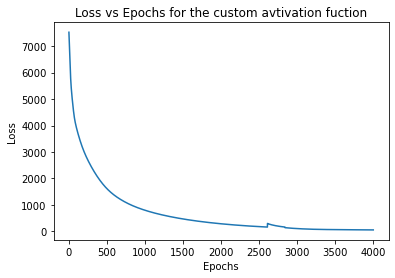

Final weights and bias: w1: -5.707104379610515, w2: -3.7888375035748028, w3: -3.7888375035748028, w3: -3.7888375035748028, bias: 13.584746323326062
Alpha Value: 0.030773189566908


In [96]:
model4 = myNN_FAF()
model4.fit(x_train,y_train,epochs = 4000)

Epoch:0, w1:0.9283107236120236, w2:0.8919362929968809, w3:1.0248196752361767, w4:0.994386702912007, bias:0.0008016558462406394, loss:1741.57502494166
Epoch:1, w1:0.858056759642454, w2:0.7935236166951631, w3:1.0454819012229943, w4:0.985917999627694, bias:0.0021098169083016375, loss:1567.4056597555045
Epoch:2, w1:0.7911139516516933, w2:0.7094794580995367, w3:1.0589239646689272, w4:0.9741096661188282, bias:0.004067929619162878, loss:1419.9722228034375
Epoch:3, w1:0.7289015999516786, w2:0.6428686542310945, w3:1.062054920616572, w4:0.9595160221156999, bias:0.006553311289925781, loss:1306.971493867796
Epoch:4, w1:0.671146081327464, w2:0.5915747318799465, w3:1.0559794201388628, w4:0.9430870887005097, bias:0.009451148765344263, loss:1225.689209607054
Epoch:5, w1:0.6168493706773274, w2:0.5513957755523315, w3:1.0440322449495734, w4:0.9254048658170616, bias:0.01278757658423505, loss:1164.6674286270031
Epoch:6, w1:0.5653011906316989, w2:0.5192181924052602, w3:1.0285606480435043, w4:0.9068372421112

Epoch:67, w1:-0.8421534371759924, w2:0.04445123697186343, w3:0.28612854962870093, w4:0.027456847354800445, bias:0.57305917557625, loss:332.01836351213046
Epoch:68, w1:-0.8518362741896948, w2:0.03849188695907627, w3:0.278291155097717, w4:0.02003075344287203, bias:0.5822975760675698, loss:328.5451557725956
Epoch:69, w1:-0.8613416114683884, w2:0.03260550850340502, w3:0.2705345791347329, w4:0.012716390015952619, bias:0.5915066848724198, loss:325.15394780513066
Epoch:70, w1:-0.8706756612462431, w2:0.026791278660291146, w3:0.26285841181295405, w4:0.005509697157322327, bias:0.6006866520588462, loss:321.84143424958677
Epoch:71, w1:-0.8798442846176654, w2:0.021048241179963106, w3:0.25526216754326925, w4:-0.0015930936692023752, bias:0.6098376023610277, loss:318.60450561126123
Epoch:72, w1:-0.8888530139533846, w2:0.015375330272270813, w3:0.24774529019214753, w4:-0.008595482091780227, bias:0.6189596375800991, loss:315.44023381263486
Epoch:73, w1:-0.8977070741269125, w2:0.00977139151228408, w3:0.24

Epoch:138, w1:-1.2702000295293605, w2:-0.25907158069963854, w3:-0.11647130497443899, w4:-0.3257734714554398, bias:1.157779417880819, loss:194.41998593433428
Epoch:139, w1:-1.2739056643095101, w2:-0.26226858541935394, w3:-0.12056923155804734, w4:-0.3289638714703848, bias:1.165019700164727, loss:193.3455078202074
Epoch:140, w1:-1.277570353531885, w2:-0.2654459932239316, w3:-0.12463715910290052, w4:-0.3321169119840528, bias:1.1722346469231122, loss:192.2843420266761
Epoch:141, w1:-1.2811947063069227, w2:-0.2686040047836322, w3:-0.12867545768298322, w4:-0.33523296497361615, bias:1.1794243944572789, loss:191.23624816734224
Epoch:142, w1:-1.2847793206574807, w2:-0.2717428151540523, w3:-0.13268449103089566, w4:-0.33831239963278914, bias:1.186589079951427, loss:190.20099122686094
Epoch:143, w1:-1.288324783759443, w2:-0.274862614042854, w3:-0.13666461674066574, w4:-0.3413555824306106, bias:1.193728841399254, loss:189.17834140188495
Epoch:144, w1:-1.29183167217465, w2:-0.27796358606534227, w3:-0

Epoch:212, w1:-1.411641735658336, w2:-0.4673308740484068, w3:-0.39700137702890553, w4:-0.4286052475540263, bias:1.5837069315056198, loss:106.21697809272513
Epoch:213, w1:-1.412444460845832, w2:-0.46939340025319637, w3:-0.4000661955831104, w4:-0.42893569412705757, bias:1.5882500805231603, loss:105.85327970447837
Epoch:214, w1:-1.4132524406297824, w2:-0.47143794201361744, w3:-0.4030904846275389, w4:-0.42927091748189944, bias:1.5927887625745256, loss:105.49326491708592
Epoch:215, w1:-1.4140653096061238, w2:-0.473465026702849, w3:-0.40607534044455057, w4:-0.42961050464779355, bias:1.5973227925654845, loss:105.13682416472152
Epoch:216, w1:-1.4148827167593891, w2:-0.47547513992970825, w3:-0.40902183041786605, w4:-0.42995406755358145, bias:1.6018519945582244, loss:104.78385380820036
Epoch:217, w1:-1.4157043248886092, w2:-0.4774687301438939, w3:-0.4119309928975841, w4:-0.43030124096257555, bias:1.6063762013006886, loss:104.43425573163421
Epoch:218, w1:-1.4165298100662596, w2:-0.479446212710859

Epoch:285, w1:-1.4713906185291263, w2:-0.5861327933209229, w3:-0.5572488344828428, w4:-0.4527387098200937, bias:1.897990422465387, loss:85.80260096145665
Epoch:286, w1:-1.4721349790202491, w2:-0.5874395800783775, w3:-0.5589154218542876, w4:-0.45298709610184695, bias:1.9020203068746622, loss:85.58191795050143
Epoch:287, w1:-1.4728763814874541, w2:-0.5887399988928793, w3:-0.5605733197019395, w4:-0.45323246563442987, bias:1.9060426854190236, loss:85.36239478606512
Epoch:288, w1:-1.4736148220665761, w2:-0.5900341134143495, w3:-0.5622226461612099, w4:-0.45347481876986884, bias:1.9100575719046142, loss:85.14402062135761
Epoch:289, w1:-1.4743502977441425, w2:-0.5913219862813887, w3:-0.5638635164502431, w4:-0.4537141566698432, bias:1.914064980494853, loss:84.92678478533986
Epoch:290, w1:-1.475082806322699, w2:-0.5926036791407172, w3:-0.565496042964154, w4:-0.4539504812727165, bias:1.9180649256928488, loss:84.71067677801237
Epoch:291, w1:-1.4758123463874209, w2:-0.5938792526662701, w3:-0.567120

Epoch:350, w1:-1.5138221603556479, w2:-0.6600586361324076, w3:-0.6512516639826068, w4:-0.462972254912246, bias:2.1450624643111236, loss:73.48794457301989
Epoch:351, w1:-1.5143875247914318, w2:-0.6610503288716831, w3:-0.6525151255037037, w4:-0.4630452295279838, bias:2.148640891532239, loss:73.32561229971246
Epoch:352, w1:-1.5149505207525225, w2:-0.6620383328294162, w3:-0.653774063066174, w4:-0.46311598722196395, bias:2.152212992673897, loss:73.16397303862149
Epoch:353, w1:-1.5155111618896806, w2:-0.6630226737933624, w3:-0.6550285100310924, w4:-0.4631845438942309, bias:2.1557787861807087, loss:73.00302208936826
Epoch:354, w1:-1.5160694618487456, w2:-0.6640033772515224, w3:-0.6562784992762002, w4:-0.4632509154093779, bias:2.1593382904423493, loss:72.84275480119854
Epoch:355, w1:-1.5166254342677605, w2:-0.664980468397146, w3:-0.6575240632068043, w4:-0.46331511759373384, bias:2.1628915237925033, loss:72.6831665722461
Epoch:356, w1:-1.517179092774213, w2:-0.6659539721336346, w3:-0.6587652337

Epoch:415, w1:-1.546220953299185, w2:-0.7178036328908691, w3:-0.7251669632159147, w4:-0.46375947344031304, bias:2.3652653044172203, loss:64.20099649216355
Epoch:416, w1:-1.546659300714947, w2:-0.7185987942810639, w3:-0.7261901186709323, w4:-0.4637187111093692, bias:2.3684681264263947, loss:64.07569728645616
Epoch:417, w1:-1.5470960851465767, w2:-0.7193914837641062, w3:-0.7272102415956343, w4:-0.46367662598339116, bias:2.3716656868596555, loss:63.95086407356546
Epoch:418, w1:-1.5475313171207772, w2:-0.72018171476227, w3:-0.7282273478213078, w4:-0.46363322916985233, bias:2.3748579999100863, loss:63.82649429766403
Epoch:419, w1:-1.5479650071022737, w2:-0.720969500582566, w3:-0.7292414530384251, w4:-0.4635885316951046, bias:2.378045079708258, loss:63.70258542400814
Epoch:420, w1:-1.548397165493905, w2:-0.7217548544182009, w3:-0.730252572798797, w4:-0.46354254450467614, bias:2.381226940322519, loss:63.579134938692484
Epoch:421, w1:-1.548827802636724, w2:-0.7225377893500112, w3:-0.7312607225

Epoch:480, w1:-1.571881740754115, w2:-0.7648661424631324, w3:-0.7859752433083247, w4:-0.4587917665327404, bias:2.563084820153801, loss:56.92668280944265
Epoch:481, w1:-1.572237802388742, w2:-0.765524334733236, w3:-0.7868292186679413, w4:-0.45868483521423536, bias:2.5659726392205493, loss:56.82713724126687
Epoch:482, w1:-1.5725928647472773, w2:-0.7661807383764699, w3:-0.7876809680710948, w4:-0.45857715113647446, bias:2.5688560027224536, loss:56.72792668808334
Epoch:483, w1:-1.5729469347697833, w2:-0.766835361555224, w3:-0.7885305012509194, w4:-0.45846872096218483, bias:2.5717349214307417, loss:56.629049577849834
Epoch:484, w1:-1.5733000193500608, w2:-0.7674882123765683, w3:-0.789377827879006, w4:-0.4583595512998735, bias:2.5746094060738223, loss:56.530504349091025
Epoch:485, w1:-1.5736521253359337, w2:-0.7681392988928035, w3:-0.7902229575660372, w4:-0.4582496487042407, bias:2.577479467337554, loss:56.43228945079756
Epoch:486, w1:-1.5740032595295306, w2:-0.7687886291020036, w3:-0.7910658

Epoch:549, w1:-1.594432391888181, w2:-0.8064705420578058, w3:-0.8401403140950542, w4:-0.449954137533559, bias:2.7524217352625135, loss:50.76975055465833
Epoch:550, w1:-1.594733595353672, w2:-0.8070219749787667, w3:-0.8408607634944335, w4:-0.44980838905910897, bias:2.7550253600758228, loss:50.690111484108954
Epoch:551, w1:-1.5950341838656479, w2:-0.8075720762952279, w3:-0.8415795405140208, w4:-0.44966224013664124, bias:2.7576251847461744, loss:50.61071936278577
Epoch:552, w1:-1.59533416178184, w2:-0.8081208513415069, w3:-0.8422966517359767, w4:-0.44951569454231705, bias:2.760221217635001, loss:50.53157316340073
Epoch:553, w1:-1.5956335334306306, w2:-0.8086683054220962, w3:-0.8430121037087059, w4:-0.44936875602137805, bias:2.7628134670756714, loss:50.45267186445115
Epoch:554, w1:-1.5959323031112536, w2:-0.8092144438119004, w3:-0.8437259029471047, w4:-0.44922142828840594, bias:2.7654019413736486, loss:50.37401445017414
Epoch:555, w1:-1.5962304750939904, w2:-0.809759271756472, w3:-0.844438

Epoch:622, w1:-1.6150460132994737, w2:-0.8435281808277928, w3:-0.888714034021515, w4:-0.43846689477613676, bias:2.9329912991024756, loss:45.54687336920121
Epoch:623, w1:-1.6153121499016818, w2:-0.8439947953198315, w3:-0.8893278304803899, w4:-0.4383001677037086, bias:2.93533790023576, loss:45.48287842162531
Epoch:624, w1:-1.6155779235797836, w2:-0.8444604016504024, w3:-0.889940359161058, w4:-0.4381332486582328, bias:2.9376812466631925, loss:45.41906824544385
Epoch:625, w1:-1.6158433369971477, w2:-0.8449250034717688, w3:-0.8905516246925513, w4:-0.4379661397254485, bias:2.940021345052918, loss:45.35544214028282
Epoch:626, w1:-1.616108392799256, w2:-0.845388604418625, w3:-0.8911616316828183, w4:-0.4377988429744492, bias:2.9423582020540167, loss:45.29199940918604
Epoch:627, w1:-1.6163730936138243, w2:-0.8458512081082112, w3:-0.891770384718844, w4:-0.4376313604578231, bias:2.9446918242965965, loss:45.22873935859285
Epoch:628, w1:-1.616637442050919, w2:-0.8463128181404278, w3:-0.8923778883667

Epoch:692, w1:-1.6329298494861197, w2:-0.8739415711818634, w3:-0.9288535091720318, w4:-0.42643284976839746, bias:3.0897418168430484, loss:41.47799791160934
Epoch:693, w1:-1.6331761344573201, w2:-0.8743455672401274, w3:-0.9293886863601961, w4:-0.4262569259290974, bias:3.0918757244474517, loss:41.425414262793176
Epoch:694, w1:-1.6334222055811227, w2:-0.874748773843283, w3:-0.9299228747182313, w4:-0.4260809226167452, bias:3.0940068024949956, loss:41.37297354593741
Epoch:695, w1:-1.6336680645163317, w2:-0.8751511936443762, w3:-0.9304560776461657, w4:-0.4259048410334903, bias:3.096135056506428, loss:41.320675254962794
Epoch:696, w1:-1.6339137129104875, w2:-0.875552829284975, w3:-0.9309882985295351, w4:-0.4257286823722413, bias:3.0982604919884285, loss:41.268518886019976
Epoch:697, w1:-1.6341591523999395, w2:-0.8759536833952344, w3:-0.931519540739456, w4:-0.4255524478167424, bias:3.1003831144336647, loss:41.21650393747686
Epoch:698, w1:-1.6344043846099185, w2:-0.8763537585939604, w3:-0.93204

Epoch:764, w1:-1.6502040645027307, w2:-0.901158693992924, w3:-0.9650476368071732, w4:-0.4136263634498198, bias:3.236466317287672, loss:38.0292579638091
Epoch:765, w1:-1.6504385892066926, w2:-0.9015120062722048, w3:-0.9655195133709155, w4:-0.41344730932282914, bias:3.2384098206717273, loss:37.9857930932393
Epoch:766, w1:-1.6506729945918022, w2:-0.9018646941906442, w3:-0.9659906127803604, w4:-0.4132682426085845, bias:3.2403508589753436, loss:37.942439750679455
Epoch:767, w1:-1.650907281665972, w2:-0.9022167597152666, w3:-0.9664609375541895, w4:-0.41308916400505163, bias:3.242289436827879, loss:37.89919756321229
Epoch:768, w1:-1.6511414514300191, w2:-0.9025682048052645, w3:-0.9669304902008533, w4:-0.4129100742050635, bias:3.2442255588478073, loss:37.85606615943935
Epoch:769, w1:-1.6513755048777103, w2:-0.9029190314120366, w3:-0.9673992732186193, w4:-0.4127309738963614, bias:3.2461592296427533, loss:37.813045169473355
Epoch:770, w1:-1.6516094429958066, w2:-0.9032692414792275, w3:-0.9678672

Epoch:833, w1:-1.6661534931956883, w2:-0.9241691912176163, w3:-0.9959075412073535, w4:-0.4012746518589145, bias:3.3650184881939365, loss:35.273520864360776
Epoch:834, w1:-1.6663818134564978, w2:-0.9244836580693736, w3:-0.9963312053976574, w4:-0.40109612948491363, bias:3.366802219732298, loss:35.23695006115818
Epoch:835, w1:-1.6666100694189778, w2:-0.9247976197623577, w3:-0.9967542445121997, w4:-0.40091763251379714, bias:3.368583781778387, loss:35.200468257028334
Epoch:836, w1:-1.6668382616930517, w2:-0.9251110778032969, w3:-0.9971766604633406, w4:-0.4007391613693501, bias:3.3703631782843533, loss:35.16407516824357
Epoch:837, w1:-1.6670663908840542, w2:-0.9254240336932883, w3:-0.9975984551559713, w4:-0.40056071647236496, bias:3.372140413193512, loss:35.12777051216639
Epoch:838, w1:-1.6672944575927595, w2:-0.9257364889278237, w3:-0.9980196304875475, w4:-0.40038229824066396, bias:3.3739154904403694, loss:35.09155400724445
Epoch:839, w1:-1.6675224624154108, w2:-0.9260484449968152, w3:-0.99

Epoch:903, w1:-1.6820101371970815, w2:-0.9450395208355951, w3:-1.0241526930290166, w4:-0.38886013901703675, bias:3.4848489006100225, loss:32.91390861186035
Epoch:904, w1:-1.6822352027357426, w2:-0.9453219790119216, w3:-1.0245368400372736, w4:-0.388684273156598, bias:3.4864898501484247, loss:32.88293794566981
Epoch:905, w1:-1.6824602370144819, w2:-0.9456040251864962, w3:-1.0249204794776365, w4:-0.3885084562218549, bias:3.48812888678159, loss:32.852038800125015
Epoch:906, w1:-1.6826852403827506, w2:-0.9458856605268252, w3:-1.0253036128117197, w4:-0.38833268847281444, bias:3.489766013898035, loss:32.82121095710896
Epoch:907, w1:-1.682910213187052, w2:-0.9461668861962804, w3:-1.0256862414956445, w4:-0.38815697016769735, bias:3.4914012348789574, loss:32.79045419930332
Epoch:908, w1:-1.6831351557709606, w2:-0.9464477033541169, w3:-1.0260683669800625, w4:-0.3879813015629512, bias:3.4930345530982527, loss:32.75976831018505
Epoch:909, w1:-1.683360068475141, w2:-0.9467281131554902, w3:-1.0264499

Epoch:970, w1:-1.697035063866572, w2:-0.9631062043247705, w3:-1.0488343358410719, w4:-0.3771965005342978, bias:3.590719977311566, loss:30.98713799717262
Epoch:971, w1:-1.6972586797440024, w2:-0.9633634543262727, w3:-1.0491874613773846, w4:-0.3770244108070137, bias:3.5922399173117965, loss:30.96051275306086
Epoch:972, w1:-1.6974822820739668, w2:-0.963620362185117, w3:-1.0495401661809536, w4:-0.37685238401262655, bias:3.5937581561033123, loss:30.933946030063375
Epoch:973, w1:-1.6977058710448933, w2:-0.9638769288267112, w3:-1.049892451392698, w4:-0.37668042031515814, bias:3.5952746966226967, loss:30.907437656766763
Epoch:974, w1:-1.6979294468432968, w2:-0.9641331551733296, w3:-1.0502443181494063, w4:-0.37650851987750206, bias:3.5967895418003377, loss:30.88098746236096
Epoch:975, w1:-1.6981530096537913, w2:-0.9643890421441265, w3:-1.0505957675837545, w4:-0.3763366828614313, bias:3.598302694560441, loss:30.854595276636726
Epoch:976, w1:-1.6983765596591034, w2:-0.9646445906551476, w3:-1.0509

Epoch:1042, w1:-1.7131102135613034, w2:-0.9808058228847706, w3:-1.0732480069158445, w4:-0.3649756134412968, bias:3.6959763337586864, loss:29.21006530894512
Epoch:1043, w1:-1.713333233449636, w2:-0.9810406292486756, w3:-1.073573526294639, w4:-0.3648084137127593, bias:3.6973809378927127, loss:29.187249058246053
Epoch:1044, w1:-1.713556249143251, w2:-0.981275152783882, w3:-1.0738986974848885, w4:-0.3646412862311593, bias:3.6987840372632084, loss:29.164480393481245
Epoch:1045, w1:-1.7137792607208102, w2:-0.9815093942191037, w3:-1.0742235213699818, w4:-0.364474231095206, bias:3.700185634396372, loss:29.141759181025314
Epoch:1046, w1:-1.714002268259797, w2:-0.9817433542806919, w3:-1.0745479988302413, w4:-0.36430724840289047, bias:3.7015857318131786, loss:29.119085287705467
Epoch:1047, w1:-1.7142252718365252, w2:-0.9819770336926443, w3:-1.0748721307429359, w4:-0.3641403382514905, bias:3.7029843320293914, loss:29.096458580799734
Epoch:1048, w1:-1.7144482715261462, w2:-0.9822104331766136, w3:-1

Epoch:1115, w1:-1.7293833665179266, w2:-0.9972462937832208, w3:-1.0961476659178573, w4:-0.35296531549480253, bias:3.794709528063879, loss:27.66169125621314
Epoch:1116, w1:-1.7296062218351294, w2:-0.9974622309903532, w3:-1.0964499111346793, w4:-0.35280360877749345, bias:3.7960106111791365, loss:27.642023951065784
Epoch:1117, w1:-1.7298290760623527, w2:-0.997677932874868, w3:-1.0967518653102835, w4:-0.35264197986175105, bias:3.7973103609377596, loss:27.622395564824913
Epoch:1118, w1:-1.7300519292109635, w2:-0.9978934000143728, w3:-1.0970535291337764, w4:-0.3524804288034194, bias:3.798608779514653, loss:27.602805992714398
Epoch:1119, w1:-1.730274781291635, w2:-0.9981086329846763, w3:-1.0973549032919776, w4:-0.35231895565786836, bias:3.7999058690803067, loss:27.58325513030023
Epoch:1120, w1:-1.7304976323143517, w2:-0.9983236323597946, w3:-1.0976559884694277, w4:-0.35215756047999625, bias:3.801201631800805, loss:27.56374287348924
Epoch:1121, w1:-1.7307204822884144, w2:-0.9985383987119573, w

Epoch:1189, w1:-1.745871733746572, w2:-1.0126255138881703, w3:-1.1177698863765888, w4:-0.3412122730048871, bias:3.887524345305068, loss:26.30501257070948
Epoch:1190, w1:-1.7460944997138708, w2:-1.0128254878182346, w3:-1.1180523173018027, w4:-0.34105644638102955, bias:3.888732359399012, loss:26.287963047736667
Epoch:1191, w1:-1.7463172638662283, w2:-1.0130252647036022, w3:-1.1183345025428744, w4:-0.3409007005579927, bias:3.8899391897771527, loss:26.27094553693281
Epoch:1192, w1:-1.746540026176047, w2:-1.0132248450047765, w3:-1.1186164426416276, w4:-0.34074503556244673, bias:3.891144838313259, loss:26.253959955694846
Epoch:1193, w1:-1.7467627866153514, w2:-1.0134242291808793, w3:-1.1188981381381704, w4:-0.34058945142073765, bias:3.8923493068773647, loss:26.237006221679955
Epoch:1194, w1:-1.7469855451557905, w2:-1.0136234176896557, w3:-1.1191795895709016, w4:-0.34043394815888894, bias:3.893552597335777, loss:26.220084252804597
Epoch:1195, w1:-1.7472083017686415, w2:-1.0138224109874794, w3

Epoch:1259, w1:-1.7614591487799036, w2:-1.02617182340318, w3:-1.136974885873997, w4:-0.33050072407207437, bias:3.969325902708959, loss:25.184561316516184
Epoch:1260, w1:-1.761681703181995, w2:-1.0263590449052473, w3:-1.1372413391703238, w4:-0.3303506015186589, bias:3.970455384850176, loss:25.169566582397273
Epoch:1261, w1:-1.761904253089645, w2:-1.0265460985092463, w3:-1.1375075809006534, w4:-0.33020056092907, bias:3.971583805860688, loss:25.15459865831695
Epoch:1262, w1:-1.7621267984558457, w2:-1.0267329845896527, w3:-1.1377736115010901, w4:-0.33005060231065625, bias:3.9727111673720095, loss:25.139657477802984
Epoch:1263, w1:-1.7623493392334015, w2:-1.0269197035198565, w3:-1.1380394314064197, w4:-0.32990072567053347, bias:3.973837471012462, loss:25.124742974585644
Epoch:1264, w1:-1.7625718753749315, w2:-1.0271062556721653, w3:-1.1383050410501137, w4:-0.32975093101558606, bias:3.974962718407179, loss:25.109855082597008
Epoch:1265, w1:-1.7627944068328718, w2:-1.027292641417808, w3:-1.13

Epoch:1329, w1:-1.7770243821897722, w2:-1.038891400335358, w3:-1.1551384043119088, w4:-0.3201902890706008, bias:4.0459134862057065, loss:24.1962148970064
Epoch:1330, w1:-1.777246500018883, w2:-1.039067717079614, w3:-1.1553910332221573, w4:-0.32004590990678006, bias:4.046972460772827, loss:24.182946799867615
Epoch:1331, w1:-1.7774686097167416, w2:-1.0392438897046579, w3:-1.1556434781578557, w4:-0.31990161271275613, bias:4.048030481075193, loss:24.16970131220316
Epoch:1332, w1:-1.7776907112277418, w2:-1.039419918517068, w3:-1.1558957394735188, w4:-0.3197573974818826, bias:4.049087548536989, loss:24.15647838013845
Epoch:1333, w1:-1.777912804496212, w2:-1.039595803822563, w3:-1.156147817522638, w4:-0.319613264207343, bias:4.050143664579665, loss:24.14327794995765
Epoch:1334, w1:-1.778134889466416, w2:-1.039771545926003, w3:-1.1563997126576866, w4:-0.31946921288215174, bias:4.051198830621941, loss:24.13009996810318
Epoch:1335, w1:-1.7783569660825542, w2:-1.0399471451313935, w3:-1.1566514252

Epoch:1402, w1:-1.7932141034296445, w2:-1.0514019490066195, w3:-1.1731178184344162, w4:-0.30986543905203445, bias:4.120796510825703, loss:23.28387571111083
Epoch:1403, w1:-1.793435478788814, w2:-1.0515685001116009, w3:-1.173357889026383, w4:-0.30972701641162753, bias:4.1217894030152555, loss:23.27212583659744
Epoch:1404, w1:-1.793656841859139, w2:-1.0517349273795769, w3:-1.1735977990477122, w4:-0.3095886748522346, bias:4.122781438075417, loss:23.260395024315557
Epoch:1405, w1:-1.7938781925832352, w2:-1.0519012310610685, w3:-1.1738375487869988, w4:-0.30945041435657367, bias:4.123772617245633, loss:23.248683230673777
Epoch:1406, w1:-1.79409953090373, w2:-1.0520674114059163, w3:-1.1740771385320456, w4:-0.3093122349072393, bias:4.124762941763019, loss:23.236990412204783
Epoch:1407, w1:-1.7943208567632627, w2:-1.052233468663282, w3:-1.1743165685698667, w4:-0.30917413648670333, bias:4.125752412862364, loss:23.22531652556492
Epoch:1408, w1:-1.7945421701044861, w2:-1.0523994030816508, w3:-1.17

Epoch:1469, w1:-1.8080163487728846, w2:-1.0622985689294706, w3:-1.1888607699479794, w4:-0.30076947487924416, bias:4.185482810863592, loss:22.536783742015466
Epoch:1470, w1:-1.8082367750075636, w2:-1.062457345825866, w3:-1.1890906844480371, w4:-0.3006364409441252, bias:4.186420907882963, loss:22.52622029902335
Epoch:1471, w1:-1.808457185167839, w2:-1.0626160142625671, w3:-1.189320456085252, w4:-0.30050348668385046, bias:4.187358225894946, loss:22.51567325336703
Epoch:1472, w1:-1.808677579198591, w2:-1.0627745744488968, w3:-1.189550085100702, w4:-0.3003706120739759, bias:4.188294765993443, loss:22.505142568926683
Epoch:1473, w1:-1.808897957044752, w2:-1.0629330265936254, w3:-1.1897795717348338, w4:-0.3002378170899663, bias:4.189230529270336, loss:22.494628209682077
Epoch:1474, w1:-1.8091183186513087, w2:-1.0630913709049727, w3:-1.1900089162274656, w4:-0.3001051017071951, bias:4.190165516815497, loss:22.484130139712263
Epoch:1475, w1:-1.8093386639633007, w2:-1.0632496075906097, w3:-1.1902

Epoch:1542, w1:-1.8240618560132569, w2:-1.073616692717211, w3:-1.2052834219127795, w4:-0.2912657692735829, bias:4.251982566599368, loss:21.806601850866414
Epoch:1543, w1:-1.8242809676977176, w2:-1.0737680695678633, w3:-1.2055035038718371, w4:-0.2911384821074095, bias:4.252866549997208, loss:21.797146351275337
Epoch:1544, w1:-1.8245000594476777, w2:-1.0739193518874026, w3:-1.2057234590293342, w4:-0.291011272615663, bias:4.25374982920187, loss:21.7877048551929
Epoch:1545, w1:-1.824719131212862, w2:-1.0740705398489498, w3:-1.2059432875852887, w4:-0.2908841407682278, bias:4.25463240517084, loss:21.778277332991777
Epoch:1546, w1:-1.8249381829430726, w2:-1.0742216336251837, w3:-1.2061629897392208, w4:-0.29075708653492327, bias:4.255514278859878, loss:21.76886375512356
Epoch:1547, w1:-1.8251572145881887, w2:-1.0743726333883417, w3:-1.2063825656901541, w4:-0.29063010988550453, bias:4.256395451223023, loss:21.759464092118506
Epoch:1548, w1:-1.8253762260981672, w2:-1.0745235393102208, w3:-1.2066

Epoch:1615, w1:-1.840001581065725, w2:-1.0844290798517373, w3:-1.2210280916044292, w4:-0.28217599553841305, bias:4.3147204627341065, loss:21.151391211282313
Epoch:1616, w1:-1.8402191104103403, w2:-1.0845739847385119, w3:-1.221239413366845, w4:-0.2820542957619794, bias:4.315555452872345, loss:21.142884758122754
Epoch:1617, w1:-1.8404366163642074, w2:-1.0847188066463862, w3:-1.2214506217128855, w4:-0.2819326713098974, bias:4.316389804399228, loss:21.13439033855589
Epoch:1618, w1:-1.8406540988831162, w2:-1.0848635457193825, w3:-1.22166171681004, w4:-0.28181112214809306, bias:4.31722351815543, loss:21.125907928115154
Epoch:1619, w1:-1.8408715579229433, w2:-1.085008202101166, w3:-1.2218726988254014, w4:-0.281689648242448, bias:4.318056594980144, loss:21.117437502396974
Epoch:1620, w1:-1.8410889934396528, w2:-1.0851527759350463, w3:-1.2220835679256672, w4:-0.2815682495588, bias:4.318889035711089, loss:21.108979037060514
Epoch:1621, w1:-1.841306405389296, w2:-1.085297267363978, w3:-1.22229432

Epoch:1688, w1:-1.8558170983868283, w2:-1.094797652174963, w3:-1.236166525184589, w4:-0.27348770040603476, bias:4.374047194309873, loss:20.560588434754475
Epoch:1689, w1:-1.8560328095021124, w2:-1.0949368569727875, w3:-1.236369984312851, w4:-0.2733714072659721, bias:4.374837686389962, loss:20.552899851781245
Epoch:1690, w1:-1.8562484942313149, w2:-1.0950759884282988, w3:-1.2365733412804705, w4:-0.2732551868610947, bias:4.375627597526173, loss:20.545221670532896
Epoch:1691, w1:-1.856464152536688, w2:-1.095215046661989, w3:-1.2367765962289263, w4:-0.27313903915469945, bias:4.376416928458923, loss:20.537553870672987
Epoch:1692, w1:-1.8566797843805727, w2:-1.095354031794061, w3:-1.2369797492993793, w4:-0.27302296411005517, bias:4.377205679927357, loss:20.529896431915596
Epoch:1693, w1:-1.856895389725398, w2:-1.0954929439444294, w3:-1.2371828006326724, w4:-0.27290696169040257, bias:4.377993852669351, loss:20.522249334025226
Epoch:1694, w1:-1.8571109685336822, w2:-1.0956317832327203, w3:-1.2

Epoch:1761, w1:-1.8714924154469996, w2:-1.1047740497560083, w3:-1.2507590296508169, w4:-0.26518713854203857, bias:4.430271101555286, loss:20.02544562525061
Epoch:1762, w1:-1.8717061066548288, w2:-1.1049082000681478, w3:-1.2509553840199819, w4:-0.26507605706043275, bias:4.431021054259098, loss:20.018465912759986
Epoch:1763, w1:-1.871919768951697, w2:-1.1050422851213841, w3:-1.2511516457742031, w4:-0.2649650455718603, bias:4.431770476885782, loss:20.011495241513146
Epoch:1764, w1:-1.872133402306219, w2:-1.1051763050170764, w3:-1.2513478150339743, w4:-0.26485410403802745, bias:4.432519370089492, loss:20.00453359450073
Epoch:1765, w1:-1.8723470066870942, w2:-1.1053102598563478, w3:-1.2515438919195314, w4:-0.2647432324206247, bias:4.4332677345232865, loss:19.997580954754252
Epoch:1766, w1:-1.872560582063107, w2:-1.1054441497400858, w3:-1.2517398765508527, w4:-0.264632430681327, bias:4.434015570839131, loss:19.99063730534595
Epoch:1767, w1:-1.8727741284031267, w2:-1.1055779747689434, w3:-1.2

Epoch:1833, w1:-1.8868025004363966, w2:-1.114271881483592, w3:-1.2646667509123093, w4:-0.2573658760986281, bias:4.482950736527796, loss:19.5450417639587
Epoch:1834, w1:-1.8870140348163775, w2:-1.114401578792735, w3:-1.264856730306916, w4:-0.25725973544839176, bias:4.483664132600089, loss:19.538671866735953
Epoch:1835, w1:-1.8872255382378251, w2:-1.114531217574304, w3:-1.2650466251432644, w4:-0.25715366200239653, bias:4.484377043022584, loss:19.53230988391549
Epoch:1836, w1:-1.887437010675252, w2:-1.1146607979142116, w3:-1.265236435524982, w4:-0.25704765572157484, bias:4.485089468375965, loss:19.52595580115212
Epoch:1837, w1:-1.8876484521032495, w2:-1.1147903198981761, w3:-1.2654261615554854, w4:-0.2569417165668529, bias:4.485801409239969, loss:19.519609604133958
Epoch:1838, w1:-1.8878598624964869, w2:-1.114919783611723, w3:-1.2656158033379794, w4:-0.2568358444991511, bias:4.48651286619339, loss:19.513271278582394
Epoch:1839, w1:-1.8880712418297119, w2:-1.1150491891401846, w3:-1.2658053

Epoch:1908, w1:-1.9025800415656138, w2:-1.1238423398120918, w3:-1.2786873061620527, w4:-0.24958917564051736, bias:4.53514585418107, loss:19.088332248016894
Epoch:1909, w1:-1.9027891885005948, w2:-1.1239678734693126, w3:-1.2788712176324368, w4:-0.24948796662250985, bias:4.535824376136061, loss:19.082518265886247
Epoch:1910, w1:-1.902998302776173, w2:-1.1240933545374712, w3:-1.279055051766011, w4:-0.24938682186931443, bias:4.536502453484573, loss:19.076711208840862
Epoch:1911, w1:-1.9032073843724524, w2:-1.1242187830892778, w3:-1.2792388086520052, w4:-0.24928574134170892, bias:4.537180086741153, loss:19.070911064796753
Epoch:1912, w1:-1.9034164332696075, w2:-1.1243441591972834, w3:-1.2794224883794751, w4:-0.2491847250004728, bias:4.53785727641953, loss:19.065117821697058
Epoch:1913, w1:-1.9036254494478828, w2:-1.1244694829338808, w3:-1.279606091037304, w4:-0.24908377280638744, bias:4.538534023032615, loss:19.059331467511985
Epoch:1914, w1:-1.903834432887593, w2:-1.1245947543713046, w3:-1

Epoch:1980, w1:-1.9175540276659724, w2:-1.1327505240635323, w3:-1.2917364084747383, w4:-0.2424640509425521, bias:4.582892888688522, loss:18.686732284589716
Epoch:1981, w1:-1.9177607763502091, w2:-1.1328724480891064, w3:-1.2919149698673529, w4:-0.24236736892810581, bias:4.583540666971517, loss:18.68138756769695
Epoch:1982, w1:-1.917967491115643, w2:-1.1329943243781722, w3:-1.292093459929902, w4:-0.24227074836383525, bias:4.584188035696379, loss:18.67604897104337
Epoch:1983, w1:-1.9181741719471548, w2:-1.1331161529929925, w3:-1.2922718787402008, w4:-0.242174189210851, bias:4.584834995322635, loss:18.67071648432401
Epoch:1984, w1:-1.9183808188296876, w2:-1.1332379339956986, w3:-1.2924502263759192, w4:-0.24207769143027102, bias:4.585481546309099, loss:18.665390097256285
Epoch:1985, w1:-1.9185874317482465, w2:-1.1333596674482902, w3:-1.292628502914584, w4:-0.2419812549832208, bias:4.586127689113876, loss:18.66006979957995
Epoch:1986, w1:-1.918794010687899, w2:-1.1334813534126358, w3:-1.2928

Epoch:2052, w1:-1.9323523971763628, w2:-1.1414106216886353, w3:-1.304415006341338, w4:-0.2356577016853027, bias:4.628512786833535, loss:18.316963657625298
Epoch:2053, w1:-1.932556668655863, w2:-1.1415292603006644, w3:-1.3045886226107664, w4:-0.23556534518839997, bias:4.6291322103819015, loss:18.31203453615821
Epoch:2054, w1:-1.9327609052802535, w2:-1.1416478553412939, w3:-1.3047621728042451, w4:-0.23547304736428223, bias:4.629751255716536, loss:18.307110846891028
Epoch:2055, w1:-1.9329651070386067, w2:-1.1417664068641016, w3:-1.3049356569900548, w4:-0.23538080817475007, bias:4.630369923249009, loss:18.30219258099129
Epoch:2056, w1:-1.9331692739200494, w2:-1.1418849149225554, w3:-1.305109075236355, w4:-0.23528862758161573, bias:4.630988213390272, loss:18.297279729645133
Epoch:2057, w1:-1.9333734059137626, w2:-1.1420033795700137, w3:-1.3052824276111847, w4:-0.23519650554670313, bias:4.631606126550655, loss:18.292372284057233
Epoch:2058, w1:-1.933577503008981, w2:-1.1421218008597256, w3:-

Epoch:2124, w1:-1.9469702565776592, w2:-1.1498443193438146, w3:-1.3167504393137102, w4:-0.2291557359944374, bias:4.672168490780003, loss:17.975443332572983
Epoch:2125, w1:-1.9471719936805318, w2:-1.1499599514802263, w3:-1.316919465710502, w4:-0.22906750704435974, bias:4.672761699019991, loss:17.970883815712067
Epoch:2126, w1:-1.947373695273668, w2:-1.1500755436376666, w3:-1.3170884306547375, w4:-0.2289793340492981, bias:4.673354557157976, loss:17.966329139948307
Epoch:2127, w1:-1.947575361349771, w2:-1.150191095862462, w3:-1.3172573342066796, w4:-0.22889121697200937, bias:4.673947065563619, loss:17.961779297674724
Epoch:2128, w1:-1.9477769919015908, w2:-1.1503066082008468, w3:-1.3174261764264883, w4:-0.22880315577526528, bias:4.674539224606031, loss:17.957234281299872
Epoch:2129, w1:-1.947978586921924, w2:-1.1504220806989645, w3:-1.317594957374222, w4:-0.2287151504218523, bias:4.675131034653784, loss:17.95269408324777
Epoch:2130, w1:-1.9481801464036133, w2:-1.150537513402866, w3:-1.317

Epoch:2193, w1:-1.9608064677519494, w2:-1.1577314963091434, w3:-1.328272164676582, w4:-0.2231972707747125, bias:4.712297428657211, loss:17.67180831818579
Epoch:2194, w1:-1.9610057399240994, w2:-1.1578444739500033, w3:-1.3284370870689304, w4:-0.22311281615348658, bias:4.712867319418022, loss:17.66756577201753
Epoch:2195, w1:-1.9612049761873478, w2:-1.1579574146040352, w3:-1.3286019519390662, w4:-0.22302841495399428, bias:4.713436884357667, loss:17.66332757654582
Epoch:2196, w1:-1.9614041765373884, w2:-1.1580703183117194, w3:-1.3287667593407262, w4:-0.22294406714009105, bias:4.7140061238105035, loss:17.65909372514973
Epoch:2197, w1:-1.9616033409699554, w2:-1.1581831851134583, w3:-1.3289315093275595, w4:-0.22285977267564921, bias:4.71457503811041, loss:17.65486421122145
Epoch:2198, w1:-1.9618024694808223, w2:-1.1582960150495767, w3:-1.3290962019531283, w4:-0.22277553152455815, bias:4.715143627590786, loss:17.650639028166218
Epoch:2199, w1:-1.962001562065803, w2:-1.1584088081603223, w3:-1.

Epoch:2262, w1:-1.9744718133343166, w2:-1.1654422381453096, w3:-1.3395196047608764, w4:-0.21749335047037768, bias:4.750872627613664, loss:17.388943458492488
Epoch:2263, w1:-1.9746685997104008, w2:-1.1655527547419553, w3:-1.3396806797747305, w4:-0.21741249806281573, bias:4.751420796696443, loss:17.384986238228514
Epoch:2264, w1:-1.9748653499697233, w2:-1.165663236971771, w3:-1.3398417007791323, w4:-0.2173316966240311, bias:4.751968661946389, loss:17.381032940992394
Epoch:2265, w1:-1.9750620641105339, w2:-1.1657736848702815, w3:-1.3400026678222248, w4:-0.21725094611910303, bias:4.752516223666673, loss:17.377083560998166
Epoch:2266, w1:-1.9752587421311159, w2:-1.1658840984729457, w3:-1.340163580952075, w4:-0.21717024651312924, bias:4.753063482160039, loss:17.37313809247098
Epoch:2267, w1:-1.9754553840297868, w2:-1.1659944778151563, w3:-1.3403244402166758, w4:-0.2170895977712259, bias:4.753610437728808, loss:17.369196529647105
Epoch:2268, w1:-1.9756519898048983, w2:-1.1661048229322406, w3:

Epoch:2338, w1:-1.9893245643070971, w2:-1.173745969448943, w3:-1.351610669908722, w4:-0.2114913975387024, bias:4.791688335800826, loss:17.098982403533967
Epoch:2339, w1:-1.9895186031126249, w2:-1.1738539709599636, w3:-1.3517677723343609, w4:-0.2114143205507263, bias:4.792214248698816, loss:17.095307593443188
Epoch:2340, w1:-1.9897126057598602, w2:-1.1739619406261605, w3:-1.3519248242063275, w4:-0.2113372919311869, bias:4.79273987964517, loss:17.09163629661441
Epoch:2341, w1:-1.989906572249418, w2:-1.174069878478452, w3:-1.3520818255674927, w4:-0.21126031164660683, bias:4.793265228912809, loss:17.087968508037825
Epoch:2342, w1:-1.9901005025819414, w2:-1.1741777845477006, w3:-1.3522387764606631, w4:-0.21118337966352818, bias:4.7937902967742785, loss:17.08430422271293
Epoch:2343, w1:-1.9902943967581017, w2:-1.1742856588647141, w3:-1.352395676928582, w4:-0.2111064959485125, bias:4.794315083501755, loss:17.08064343564854
Epoch:2344, w1:-1.9904882547785985, w2:-1.174393501460245, w3:-1.35255

Epoch:2415, w1:-2.004159834981834, w2:-1.1819710969715047, w3:-1.363562688682779, w4:-0.20569557314440218, bias:4.831378111241621, loss:16.825947589328482
Epoch:2416, w1:-2.004351093369522, w2:-1.1820767330107054, w3:-1.3637160194131166, w4:-0.20562212400610555, bias:4.831883086044276, loss:16.822529296899713
Epoch:2417, w1:-2.004542315723838, w2:-1.1821823394325337, w3:-1.363869302713072, w4:-0.20554872071602048, bias:4.832387798866281, loss:16.81911415781253
Epoch:2418, w1:-2.0047335020473716, w2:-1.1822879162639899, w3:-1.3640225386209586, w4:-0.2054753632421903, bias:4.832892249953681, loss:16.815702167717728
Epoch:2419, w1:-2.0049246523427358, w2:-1.182393463532028, w3:-1.3641757271750354, w4:-0.20540205155267827, bias:4.8333964395521924, loss:16.812293322273995
Epoch:2420, w1:-2.005115766612566, w2:-1.1824989812635551, w3:-1.3643288684135066, w4:-0.2053287856155677, bias:4.833900367907207, loss:16.808887617147825
Epoch:2421, w1:-2.0053068448595206, w2:-1.1826044694854325, w3:-1.3

Epoch:2487, w1:-2.017838514973751, w2:-1.1895027536205236, w3:-1.3744834994951518, w4:-0.2005225379076194, bias:4.867081020117363, loss:16.587638935535995
Epoch:2488, w1:-2.018027186894299, w2:-1.189606323549166, w3:-1.3746335100168627, w4:-0.20045230935330854, bias:4.867567742275728, loss:16.58443701842544
Epoch:2489, w1:-2.0182158230234446, w2:-1.1897098656914233, w3:-1.3747834757333306, w4:-0.20038212439753253, bias:4.86805421936556, loss:16.581237960602703
Epoch:2490, w1:-2.0184044233652902, w2:-1.189813380071195, w3:-1.3749333966791981, w4:-0.20031198300977843, bias:4.86854045161073, loss:16.57804175824237
Epoch:2491, w1:-2.0185929879239586, w2:-1.1899168667123405, w3:-1.37508327288906, w4:-0.20024188515955343, bias:4.869026439234816, loss:16.574848407525756
Epoch:2492, w1:-2.0187815167035903, w2:-1.1900203256386803, w3:-1.3752331043974644, w4:-0.2001718308163848, bias:4.869512182461112, loss:16.571657904640865
Epoch:2493, w1:-2.018970009708345, w2:-1.1901237568739946, w3:-1.37538

Epoch:2560, w1:-2.0315177804278024, w2:-1.1969917802856103, w3:-1.3853186237266844, w4:-0.19550855445677978, bias:4.9019813130151375, loss:16.361182366835845
Epoch:2561, w1:-2.0317038514823005, w2:-1.1970933822372702, w3:-1.3854654516517884, w4:-0.1954414296555166, bias:4.902450715983647, loss:16.358179526971753
Epoch:2562, w1:-2.0318898870915754, w2:-1.1971949580480103, w3:-1.385612237181331, w4:-0.19537434627804573, bias:4.902919889493244, loss:16.355179283925644
Epoch:2563, w1:-2.032075887260981, w2:-1.197296507739046, w3:-1.385758980346719, w4:-0.19530730429531618, bias:4.903388833747841, loss:16.352181634326477
Epoch:2564, w1:-2.0322618519958873, w2:-1.197398031331559, w3:-1.3859056811793171, w4:-0.1952403036782969, bias:4.903857548951091, loss:16.349186574808943
Epoch:2565, w1:-2.0324477813016792, w2:-1.197499528846697, w3:-1.3860523397104496, w4:-0.19517334439797676, bias:4.904326035306391, loss:16.346194102013477
Epoch:2566, w1:-2.0326336751837575, w2:-1.1976010003055737, w3:-1

Epoch:2632, w1:-2.044824632870886, w2:-1.2042415359909147, w3:-1.395783702910426, w4:-0.19077973582032925, bias:4.935203731882597, loss:16.15142006574635
Epoch:2633, w1:-2.0450081664252906, w2:-1.2043413080719474, w3:-1.3959275562429887, w4:-0.1907155204618368, bias:4.935657120069443, loss:16.148595911335654
Epoch:2634, w1:-2.0451916649566093, w2:-1.2044410554570038, w3:-1.3960713693400753, w4:-0.19065134448613608, bias:4.936110292844922, loss:16.145774125036716
Epoch:2635, w1:-2.045375128471191, w2:-1.2045407781650317, w3:-1.3962151422303042, w4:-0.19058720786559902, bias:4.936563250395421, loss:16.14295470386345
Epoch:2636, w1:-2.045558556975397, w2:-1.2046404762149496, w3:-1.3963588749422577, w4:-0.19052311057261717, bias:4.937015992907101, loss:16.140137644834706
Epoch:2637, w1:-2.0457419504756005, w2:-1.204740149625647, w3:-1.3965025675044822, w4:-0.1904590525796016, bias:4.937468520565892, loss:16.137322944974297
Epoch:2638, w1:-2.045925308978187, w2:-1.204839798415984, w3:-1.396

Epoch:2705, w1:-2.0581309493603523, w2:-1.2114611445128176, w3:-1.4061809988595884, w4:-0.18619381547143032, bias:4.967746316502289, loss:15.95129971426919
Epoch:2706, w1:-2.0583119436380195, w2:-1.2115591618331434, w3:-1.406321988028775, w4:-0.18613240366000036, bias:4.968184455592217, loss:15.948640882127222
Epoch:2707, w1:-2.058492903386054, w2:-1.211657155767694, w3:-1.4064629389603882, w4:-0.18607102926551977, bias:4.968622392295509, loss:15.945984212532192
Epoch:2708, w1:-2.058673828611606, w2:-1.2117551263334403, w3:-1.4066038516805661, w4:-0.18600969226177094, bias:4.9690601267827, loss:15.943329702834653
Epoch:2709, w1:-2.0588547193218343, w2:-1.2118530735473279, w3:-1.406744726215415, w4:-0.1859483926225553, bias:4.96949765922412, loss:15.940677350389421
Epoch:2710, w1:-2.0590355755239074, w2:-1.2119509974262772, w3:-1.4068855625910093, w4:-0.1858871303216933, bias:4.969934989789897, loss:15.938027152555605
Epoch:2711, w1:-2.0592163972250033, w2:-1.2120488979871837, w3:-1.407

Epoch:2778, w1:-2.0712532424538055, w2:-1.2185559800333872, w3:-1.4163743117398984, w4:-0.18180747495680988, bias:4.999208986137253, loss:15.762727888093721
Epoch:2779, w1:-2.071431735423055, w2:-1.218652333284793, w3:-1.4165125763371362, w4:-0.18174872685845153, bias:4.999632786755197, loss:15.760220216244786
Epoch:2780, w1:-2.071610194407995, w2:-1.2187486643264114, w3:-1.4166508045245998, w4:-0.18169001431269557, bias:5.000056396915874, loss:15.757714524268271
Epoch:2781, w1:-2.0717886194163992, w2:-1.218844973173509, w3:-1.4167889963262432, w4:-0.18163133729469272, bias:5.000479816775648, loss:15.755210809805865
Epoch:2782, w1:-2.071967010456046, w2:-1.2189412598413305, w3:-1.4169271517659927, w4:-0.18157269577961213, bias:5.000903046490701, loss:15.752709070503002
Epoch:2783, w1:-2.0721453675347234, w2:-1.2190375243450993, w3:-1.4170652708677465, w4:-0.18151408974264135, bias:5.00132608621703, loss:15.750209304008798
Epoch:2784, w1:-2.072323690660226, w2:-1.219133766700017, w3:-1.

Epoch:2851, w1:-2.084194409535704, w2:-1.2255323266324443, w3:-1.4263734024522305, w4:-0.1776107703971172, bias:5.0296554391675645, loss:15.584728201689616
Epoch:2852, w1:-2.0843704425089595, w2:-1.2256270973878265, w3:-1.426509070391945, w4:-0.1775545534701858, bias:5.030065736213101, loss:15.58235908594893
Epoch:2853, w1:-2.08454644208315, w2:-1.2257218469935187, w3:-1.4266447035996164, w4:-0.17749837032967708, bias:5.0304758537504615, loss:15.579991787239234
Epoch:2854, w1:-2.0847224082665208, w2:-1.2258165754633132, w3:-1.4267803020972685, w4:-0.1774422209520613, bias:5.030885791923314, loss:15.577626303454982
Epoch:2855, w1:-2.0848983410673227, w2:-1.2259112828109835, w3:-1.4269158659068997, w4:-0.17738610531382648, bias:5.031295550875161, loss:15.575262632493866
Epoch:2856, w1:-2.085074240493812, w2:-1.2260059690502842, w3:-1.427051395050484, w4:-0.17733002339147835, bias:5.031705130749338, loss:15.572900772256794
Epoch:2857, w1:-2.085250106554251, w2:-1.2261006341949514, w3:-1.4

Epoch:2922, w1:-2.0966102303145098, w2:-1.2322092638019897, w3:-1.4359207521569333, w4:-0.17370200008521977, bias:5.058348506010835, loss:15.420919019513867
Epoch:2923, w1:-2.0967839127387813, w2:-1.2323025661644118, w3:-1.436054007467261, w4:-0.173648124525596, bias:5.05874640580959, loss:15.418673859250578
Epoch:2924, w1:-2.096957562361904, w2:-1.2323958483117419, w3:-1.4361872295496658, w4:-0.173594281125225, bias:5.059144135904906, loss:15.416430374202196
Epoch:2925, w1:-2.0971311791924614, w2:-1.232489110256525, w3:-1.4363204184245022, w4:-0.17354046986180938, bias:5.05954169642934, loss:15.41418856247773
Epoch:2926, w1:-2.0973047632390416, w2:-1.23258235201129, w3:-1.4364535741121023, w4:-0.1734866907130688, bias:5.059939087515303, loss:15.411948422188999
Epoch:2927, w1:-2.0974783145102367, w2:-1.232675573588549, w3:-1.4365866966327758, w4:-0.17343294365673984, bias:5.060336309295057, loss:15.409709951450656
Epoch:2928, w1:-2.0976518330146425, w2:-1.2327687750007983, w3:-1.436719

Epoch:2997, w1:-2.109545973118496, w2:-1.239151671812946, w3:-1.445824040998851, w4:-0.16974908987070883, bias:5.08772883806339, loss:15.257056376513528
Epoch:2998, w1:-2.109717219524529, w2:-1.239243491785959, w3:-1.4459548592416922, w4:-0.16969756551381565, bias:5.088114368183541, loss:15.254931794413556
Epoch:2999, w1:-2.109888433783055, w2:-1.2393352924412926, w3:-1.4460856457239113, w4:-0.16964607169028686, bias:5.0884997381442005, loss:15.252808753202515
Epoch:3000, w1:-2.1100596159029066, w2:-1.2394270737903443, w3:-1.4462164004642917, w4:-0.16959460837906945, bias:5.0888849480673635, loss:15.250687251187506
Epoch:3001, w1:-2.1102307658929194, w2:-1.2395188358444973, w3:-1.446347123481597, w4:-0.16954317555912649, bias:5.08926999807489, loss:15.248567286678092
Epoch:3002, w1:-2.110401883761931, w2:-1.2396105786151201, w3:-1.4464778147945712, w4:-0.16949177320943729, bias:5.089654888288508, loss:15.246448857986309
Epoch:3003, w1:-2.1105729695187825, w2:-1.2397023021135678, w3:-1.

Epoch:3067, w1:-2.1214560710539283, w2:-1.245533028862275, w3:-1.4549056265592302, w4:-0.16621498522694783, bias:5.1143357191982926, loss:15.11196641357994
Epoch:3068, w1:-2.121625088596106, w2:-1.245623523365588, w3:-1.4550342658670148, w4:-0.16616554823843313, bias:5.114710325636919, loss:15.109945736267118
Epoch:3069, w1:-2.1217940746146065, w2:-1.2457139993160036, w3:-1.455162874682952, w4:-0.16611614034806205, bias:5.11508478014351, loss:15.107926487056003
Epoch:3070, w1:-2.121963029118411, w2:-1.245804456723982, w3:-1.4552914530245131, w4:-0.16606676153588834, bias:5.11545908283116, loss:15.10590866441594
Epoch:3071, w1:-2.1221319521165016, w2:-1.2458948955999711, w3:-1.4554200009091525, w4:-0.16601741178198118, bias:5.115833233812841, loss:15.103892266818464
Epoch:3072, w1:-2.1223008436178623, w2:-1.2459853159544054, w3:-1.4555485183543062, w4:-0.16596809106642516, bias:5.116207233201405, loss:15.101877292737276
Epoch:3073, w1:-2.1224697036314786, w2:-1.2460757177977075, w3:-1.4

Epoch:3139, w1:-2.133545296631068, w2:-1.2520018231309784, w3:-1.4640907436642345, w4:-0.16272872303579047, bias:5.140925667214725, loss:14.970038773053293
Epoch:3140, w1:-2.1337120675043844, w2:-1.25209100783569, w3:-1.464217231184169, w4:-0.16268133104002477, bias:5.141289616565974, loss:14.968117132647501
Epoch:3141, w1:-2.133878807503915, w2:-1.2521801747098475, w3:-1.464343689426358, w4:-0.16263396674506322, bias:5.141653421828349, loss:14.966196815477058
Epoch:3142, w1:-2.1340455166387224, w2:-1.2522693237630627, w3:-1.4644701184070594, w4:-0.16258663013204283, bias:5.142017083106644, loss:14.964277820158653
Epoch:3143, w1:-2.134212194917869, w2:-1.2523584550049356, w3:-1.4645965181425153, w4:-0.16253932118211525, bias:5.142380600505543, loss:14.962360145310846
Epoch:3144, w1:-2.1343788423504186, w2:-1.2524475684450553, w3:-1.4647228886489516, w4:-0.16249203987644678, bias:5.142743974129619, loss:14.96044378955415
Epoch:3145, w1:-2.134545458945435, w2:-1.2525366640930002, w3:-1.4

Epoch:3215, w1:-2.1461325304554735, w2:-1.2587297054584645, w3:-1.4736214764497144, w4:-0.15920457118314443, bias:5.168182393570986, loss:14.827670477621893
Epoch:3216, w1:-2.1462969807821892, w2:-1.2588175616806514, w3:-1.4737457841014554, w4:-0.15915923170537866, bias:5.168535683304985, loss:14.825845591425825
Epoch:3217, w1:-2.1464614009250287, w2:-1.2589054007725633, w3:-1.473870063667079, w4:-0.15911391853584123, bias:5.168888836611981, loss:14.824021928578695
Epoch:3218, w1:-2.1466257908930757, w2:-1.258993222743024, w3:-1.4739943151616914, w4:-0.15906863165675247, bias:5.169241853588839, loss:14.82219948783409
Epoch:3219, w1:-2.146790150695414, w2:-1.2590810276008482, w3:-1.474118538600385, w4:-0.15902337105034653, bias:5.169594734332325, loss:14.82037826794731
Epoch:3220, w1:-2.1469544803411273, w2:-1.25916881535484, w3:-1.4742427339982371, w4:-0.15897813669887143, bias:5.169947478939105, loss:14.818558267675328
Epoch:3221, w1:-2.1471187798392988, w2:-1.2592565860137943, w3:-1.

Epoch:3287, w1:-2.157896345517155, w2:-1.2650120849863016, w3:-1.4825007257232896, w4:-0.15600632633510916, bias:5.193276223934983, loss:14.699332913290249
Epoch:3288, w1:-2.158058645807668, w2:-1.2650987298210898, w3:-1.4826230489512635, w4:-0.1559628364200349, bias:5.193619932736583, loss:14.697593020216313
Epoch:3289, w1:-2.15822091656755, w2:-1.2651853581371006, w3:-1.4827453451452817, w4:-0.15591937156782457, bias:5.193963511839899, loss:14.69585426490007
Epoch:3290, w1:-2.1583831578058557, w2:-1.2652719699425001, w3:-1.482867614319467, w4:-0.15587593176166895, bias:5.194306961334985, loss:14.69411664620968
Epoch:3291, w1:-2.158545369531639, w2:-1.265358565245446, w3:-1.4829898564879296, w4:-0.15583251698477193, bias:5.194650281311808, loss:14.692380163014814
Epoch:3292, w1:-2.158707551753952, w2:-1.2654451440540873, w3:-1.4831120716647663, w4:-0.1557891272203505, bias:5.1949934718602435, loss:14.69064481418664
Epoch:3293, w1:-2.1588697044818477, w2:-1.2655317063765643, w3:-1.4832

Epoch:3360, w1:-2.1696672224871625, w2:-1.2712942453406135, w3:-1.4913601406476427, w4:-0.1528963963852353, bias:5.21803162410347, loss:14.575241944526189
Epoch:3361, w1:-2.169827390784361, w2:-1.2713797052460827, w3:-1.4914805267230948, w4:-0.15285469268858579, bias:5.218366096115972, loss:14.573582223841727
Epoch:3362, w1:-2.169987530209584, w2:-1.2714651492071805, w3:-1.4916008867625057, w4:-0.1528130128615356, bias:5.218700444774474, loss:14.571923562078684
Epoch:3363, w1:-2.1701476407718157, w2:-1.2715505772314815, w3:-1.4917212207790949, w4:-0.15277135688820562, bias:5.21903467016275, loss:14.57026595820836
Epoch:3364, w1:-2.1703077224800382, w2:-1.2716359893265525, w3:-1.49184152878607, w4:-0.15272972475272914, bias:5.219368772364488, loss:14.568609411203408
Epoch:3365, w1:-2.1704677753432335, w2:-1.271721385499953, w3:-1.491961810796627, w4:-0.15268811643925176, bias:5.219702751463298, loss:14.566953920037772
Epoch:3366, w1:-2.1706277993703824, w2:-1.2718067657592347, w3:-1.492

Epoch:3432, w1:-2.1811260775975505, w2:-1.2774070487876799, w3:-1.4999621664678393, w4:-0.14995380648552095, bias:5.241803229344035, loss:14.458388646218765
Epoch:3433, w1:-2.1812841899975934, w2:-1.2774913796162901, w3:-1.5000807110506515, w4:-0.14991378154095125, bias:5.242129029200118, loss:14.456802615720365
Epoch:3434, w1:-2.181442274169077, w2:-1.2775756950271042, w3:-1.5001992305200265, w4:-0.14987377935373172, bias:5.242454711530064, loss:14.455217573353869
Epoch:3435, w1:-2.181600330120883, w2:-1.2776599950271774, w3:-1.500317724888374, w4:-0.14983379990884935, bias:5.242780276411993, loss:14.453633518181137
Epoch:3436, w1:-2.1817583578618933, w2:-1.277744279623558, w3:-1.5004361941680928, w4:-0.14979384319130284, bias:5.24310572392395, loss:14.452050449265212
Epoch:3437, w1:-2.1819163574009863, w2:-1.2778285488232877, w3:-1.5005546383715718, w4:-0.14975390918610254, bias:5.2434310541439055, loss:14.450468365670302
Epoch:3438, w1:-2.1820743287470403, w2:-1.277912802633401, w3:

Epoch:3503, w1:-2.1922824160868464, w2:-1.2833566211539216, w3:-1.5083171239939157, w4:-0.1471677405962841, bias:5.264647359975921, loss:14.348183497715327
Epoch:3504, w1:-2.1924385462358105, w2:-1.2834398744720241, w3:-1.5084339157611835, w4:-0.1471292947748244, bias:5.264965005408531, loss:14.346665359325794
Epoch:3505, w1:-2.1925946487826167, w2:-1.283523112856916, w3:-1.5085506832702258, w4:-0.14709087067328608, bias:5.26528253868043, loss:14.345148145304645
Epoch:3506, w1:-2.192750723736022, w2:-1.2836063363151942, w3:-1.508667426532724, w4:-0.1470524682774624, bias:5.265599959864641, loss:14.34363185479353
Epoch:3507, w1:-2.1929067711047816, w2:-1.2836895448534495, w3:-1.5087841455603497, w4:-0.14701408757315765, bias:5.265917269034117, loss:14.342116486935161
Epoch:3508, w1:-2.193062790897649, w2:-1.2837727384782671, w3:-1.5089008403647646, w4:-0.14697572854618712, bias:5.266234466261742, loss:14.34060204087331
Epoch:3509, w1:-2.1932187831233754, w2:-1.2838559171962254, w3:-1.50

Epoch:3577, w1:-2.203762059089276, w2:-1.289477452857267, w3:-1.5168949394510252, w4:-0.14438050692063067, bias:5.287854831770492, loss:14.238283530905967
Epoch:3578, w1:-2.2039161702030725, w2:-1.2895596185509162, w3:-1.5170099670392623, w4:-0.14434363070541456, bias:5.288164370184561, loss:14.236831544412572
Epoch:3579, w1:-2.2040702543573234, w2:-1.2896417697836235, w3:-1.5171249712079882, w4:-0.14430677518802487, bias:5.288473801661323, loss:14.235380421536778
Epoch:3580, w1:-2.2042243115606346, w2:-1.289723906561558, w3:-1.5172399519681905, w4:-0.14426994035504687, bias:5.288783126268934, loss:14.233930161494644
Epoch:3581, w1:-2.2043783418216094, w2:-1.289806028890883, w3:-1.5173549093308483, w4:-0.14423312619307613, bias:5.289092344075492, loss:14.232480763503162
Epoch:3582, w1:-2.204532345148849, w2:-1.289888136777757, w3:-1.5174698433069311, w4:-0.14419633268871865, bias:5.289401455149028, loss:14.231032226780275
Epoch:3583, w1:-2.2046863215509522, w2:-1.2899702302283327, w3:-

Epoch:3648, w1:-2.2146374433981277, w2:-1.2952756290503153, w3:-1.5250043201793335, w4:-0.1418129729888414, bias:5.309570155501497, loss:14.137294676919321
Epoch:3649, w1:-2.214789661641928, w2:-1.2953567830424046, w3:-1.5251177117856867, w4:-0.14177753356838924, bias:5.309872267222966, loss:14.135902112054263
Epoch:3650, w1:-2.214941853531612, w2:-1.2954379229984154, w3:-1.5252310807310243, w4:-0.14174211391861496, bias:5.310174276694525, loss:14.134510357425928
Epoch:3651, w1:-2.2150940190756248, w2:-1.295519048924148, w3:-1.525344427025725, w4:-0.14170671402681953, bias:5.310476183980056, loss:14.133119412314356
Epoch:3652, w1:-2.2152461582824077, w2:-1.295600160825397, w3:-1.525457750680159, w4:-0.14167133388031367, bias:5.31077798914338, loss:14.131729276000431
Epoch:3653, w1:-2.2153982711604003, w2:-1.2956812587079531, w3:-1.5255710517046879, w4:-0.14163597346641793, bias:5.311079692248265, loss:14.13033994776591
Epoch:3654, w1:-2.21555035771804, w2:-1.2957623425776013, w3:-1.525

Epoch:3718, w1:-2.2252295353225375, w2:-1.3009228244189532, w3:-1.532887566961923, w4:-0.139379273470588, bias:5.330474487203063, loss:14.04173321542573
Epoch:3719, w1:-2.225379929039897, w2:-1.3010030096287635, w3:-1.5329993969196838, w4:-0.1393451878575064, bias:5.3307695926049545, loss:14.04039567404321
Epoch:3720, w1:-2.2255302969884183, w2:-1.3010831811969528, w3:-1.5331112049235798, w4:-0.1393111211493544, bias:5.3310646000928426, loss:14.039058894495515
Epoch:3721, w1:-2.2256806391763764, w2:-1.3011633391289916, w3:-1.5332229909834367, w4:-0.13927707333409836, bias:5.3313595097267275, loss:14.037722876119549
Epoch:3722, w1:-2.2258309556120417, w2:-1.3012434834303466, w3:-1.5333347551090726, w4:-0.13924304439971394, bias:5.331654321566556, loss:14.036387618252968
Epoch:3723, w1:-2.2259812463036837, w2:-1.3013236141064797, w3:-1.5334464973102977, w4:-0.139209034334186, bias:5.331949035672221, loss:14.035053120234206
Epoch:3724, w1:-2.2261315112595685, w2:-1.3014037311628484, w3:-1

Epoch:3791, w1:-2.236141068036505, w2:-1.306740830043821, w3:-1.5409940621142206, w4:-0.13693996735702776, bias:5.351763538279505, loss:13.946054376510833
Epoch:3792, w1:-2.236289602214986, w2:-1.3068200335211086, w3:-1.5411043147994623, w4:-0.13690723074508643, bias:5.352051650394938, loss:13.944770753189273
Epoch:3793, w1:-2.236438111221945, w2:-1.3068992237447663, w3:-1.5412145462287208, w4:-0.13687451218339722, bias:5.352339668840265, loss:13.943487845254431
Epoch:3794, w1:-2.236586595065469, w2:-1.3069784007199539, w3:-1.5413247564112906, w4:-0.13684181166058018, bias:5.352627593671756, loss:13.942205652096662
Epoch:3795, w1:-2.236735053753642, w2:-1.307057564451827, w3:-1.5414349453564593, w4:-0.13680912916526408, bias:5.352915424945636, loss:13.94092417310703
Epoch:3796, w1:-2.2368834872945462, w2:-1.3071367149455377, w3:-1.5415451130735074, w4:-0.13677646468608634, bias:5.35320316271808, loss:13.939643407677268
Epoch:3797, w1:-2.2370318956962607, w2:-1.3072158522062336, w3:-1.5

Epoch:3866, w1:-2.2472118233387155, w2:-1.3126446556070142, w3:-1.5492046474228163, w4:-0.13453405290525053, bias:5.373115753655105, loss:13.851727486698435
Epoch:3867, w1:-2.247358491917188, w2:-1.3127228791136476, w3:-1.5493133312399923, w4:-0.13450263906019155, bias:5.373396993430563, loss:13.850495871340105
Epoch:3868, w1:-2.2475051359233573, w2:-1.3128010897427564, w3:-1.5494219944794343, w4:-0.13447124243548875, bias:5.3736781436242165, loss:13.849264927507637
Epoch:3869, w1:-2.247651755365111, w2:-1.312879287499211, w3:-1.5495306371499344, w4:-0.1344398630203933, bias:5.373959204288816, loss:13.84803465464085
Epoch:3870, w1:-2.247798350250336, w2:-1.3129574723878783, w3:-1.5496392592602786, w4:-0.13440850080416447, bias:5.374240175477069, loss:13.846805052180171
Epoch:3871, w1:-2.247944920586914, w2:-1.3130356444136213, w3:-1.5497478608192463, w4:-0.13437715577606976, bias:5.374521057241636, loss:13.845576119566665
Epoch:3872, w1:-2.2480914663827267, w2:-1.3131138035812995, w3:-

Epoch:3938, w1:-2.2577096218815402, w2:-1.3182441198957993, w3:-1.5569778034370616, w4:-0.13231563851803776, bias:5.393139146903799, loss:13.76473482241122
Epoch:3939, w1:-2.2578545412564806, w2:-1.3183214284554559, w3:-1.557085027754735, w4:-0.13228543754355818, bias:5.393414068989851, loss:13.763550161473312
Epoch:3940, w1:-2.2579994366201936, w2:-1.318398724479155, w3:-1.5571922321117186, w4:-0.13225525303594138, bias:5.393688905180146, loss:13.762366133274787
Epoch:3941, w1:-2.258144307980373, w2:-1.3184760079715145, w3:-1.55729941651636, w4:-0.132225084985008, bias:5.393963655524321, loss:13.76118273729831
Epoch:3942, w1:-2.2582891553447095, w2:-1.3185532789371488, w3:-1.5574065809770006, w4:-0.13219493338058638, bias:5.394238320071971, loss:13.759999973027124
Epoch:3943, w1:-2.2584339787208916, w2:-1.318630537380669, w3:-1.5575137255019755, w4:-0.13216479821251242, bias:5.39451289887265, loss:13.758817839945035
Epoch:3944, w1:-2.258578778116605, w2:-1.3187077833066831, w3:-1.5576

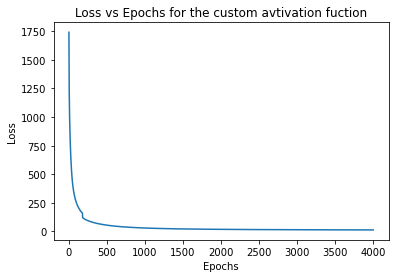

Final weights and bias: w1: -2.266506038680387, w2: -1.3229371657055067, w3: -1.3229371657055067, w3: -1.3229371657055067, bias: 5.409753969929212
Alpha Value: 0.06599317987996492


In [95]:
model4.fit(x_test,y_test,epochs = 4000)

#### Now we can see significant improvement in the loss vs Epoch function

In [76]:
predictions3 = model4.predict(x_test)
predictions3

631     1.239880e-09
1117    1.000000e+00
70      3.405861e-06
875     9.999994e-01
1193    1.000000e+00
            ...     
604     4.552550e-04
1249    1.000000e+00
1239    1.000000e+00
649     6.246676e-07
185     3.769387e-14
Length: 412, dtype: float64

In [77]:
new_predictions3 = []

for p in predictions3:
    new_predictions3.append(round(abs(p)))

new_predictions3

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


In [78]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [83]:
TP = 0
TN = 0
FP = 0
FN = 0

for actual ,predicted in zip(y_test,predictions3):
    #print("Actual:",actual,"Predicted:",predicted)
    if round(predicted) == 1 and actual == 1:
        TP = TP+1
    elif round(predicted) == 1 and actual == 0:
        FP = FP+1
    elif round(predicted) == 0 and actual == 1:
        FN = FN+1
    else:
        TN = TN+1
        
    
print("True Positive :",TP,"True Negative :",TN,"False Positive :",FP,"False Negative :",FN)

True Positive : 193 True Negative : 212 False Positive : 6 False Negative : 1


In [84]:
#Classification metrics 

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print(Precision)
print(Recall)
print(Accuracy)

0.9698492462311558
0.9948453608247423
0.9830097087378641


In [85]:
F1_Score = 2*(Precision*Recall)/(Precision + Recall)

In [86]:
F1_Score

0.9821882951653944

#### We can see that with a paramenter that trains itself while training of the Neural network we can declared that the F1 score , Precision, Reall and Acuuracy have had significant improvement and also we have not altered the learning rate , keeping it at 0.04.


Alpha Value : 0.0336517